# 1. 라이브러리

In [1]:
import pandas as pd #데이터 분석
import numpy as np #행렬 연산

import datetime # 날짜타입 사용
import random # 시드 제어

import seaborn as sns # 시각화
import matplotlib.pyplot as plt # 시각화

from workalendar.asia import SouthKorea # 한국의 공휴일
import random # 시드 제어

import talib as ta # 기술적 분석 (보조지표)

from pycaret.regression import * # AutoML pycaret
from pycaret.classification import * # AutoML pycaret
from fbprophet import Prophet # Prophet

import yfinance as yf # yahoo finance API    # pip install yfinance
import investpy # investing.com API          # pip install investpy
from pykrx import stock # krx API           # pip instasll pykrx


# 2. 입력 데이터

1) 데이터 수집기간 입력

In [2]:
# 데이터 수집기간 입력
# yahoo finance 양식, ex) yyyy-mm-dd
#start_date = '2018-01-01'
#end_date = '2020-10-13'

start_date=input('YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2018-01-01 : ')
end_date=input('YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2020-10-13 : ')

# investing.com 양식, ex) dd/mm/yyyy
start_date_ = start_date[8:] + '/' + start_date[5:7] + '/' + start_date[:4]
end_date_ = end_date[8:] + '/' + end_date[5:7] + '/' + end_date[:4]

# krx 양식 ex) yyyymmdd
start_date__ = start_date[0:4] + start_date[5:7] + start_date[8:10]
end_date__ = end_date[0:4] + end_date[5:7] + end_date[8:10]

YYYY-MM-DD 형식을 지켜 입력해주세요 : 2018-01-01
YYYY-MM-DD 형식을 지켜 입력해주세요 : 2020-10-13


# 2. 데이터 수집 (코스피지수 예측 모델)  -> Data_kospi.csv

1) 코스피 차트 데이터 및 투자지표

In [3]:
# 종합지수 (코스피) 차트 데이터
kospi_ = stock.get_index_ohlcv_by_date(start_date__, end_date__, "1001")
kospi_.columns = ['Open','High','Low','Close','Volume']

# 코스피 투자자별 공매도 거래량
kospi_short_sell_volume = stock.get_shorting_investor_volume_by_date(start_date__, end_date__, "KOSPI")
kospi_short_sell_volume.columns = ['kospi_inst_volume','kospi_indi_volume','kospi_fore_volume','kospi_etc_volume','kospi_short_sell_volume']
# 코스피 투자자별 공매도 거래대금
kospi_short_sell_value = stock.get_shorting_investor_price_by_date(start_date__, end_date__, "KOSPI")
kospi_short_sell_value.columns = ['kospi_inst_value','kospi_indi_value','kospi_fore_value','kospi_etc_value','kospi_short_sell_value']

# 참고
# 코스피 항목별 시장 거래량
#kospi_market_volume = stock.get_market_trading_volume_by_date(start_date__, end_date__, "KOSPI")
# 코스피 항목별 시장 거래대금
#kospi_market_value = stock.get_market_trading_value_by_date(start_date__, end_date__, "KOSPI")

2) 코스피 관련 주가지수

In [4]:
# 대표지수 (코스피 200)
kospi_200_ = stock.get_index_ohlcv_by_date(start_date__, end_date__, "1028")
kospi_200_.columns = ['kospi_200_Open','kospi_200_High','kospi_200_Low','kospi_200_Close','kospi_200_Volume']
kospi_200_ = kospi_200_.drop(['kospi_200_Open','kospi_200_High','kospi_200_Low','kospi_200_Volume'], axis=1)
# 대표지수 (코스피 200 중소형주)
kospi_200_midnsmall_ = stock.get_index_ohlcv_by_date(start_date__, end_date__, "1167")
kospi_200_midnsmall_.columns = ['kospi_200_midnsmall_Open','kospi_200_midnsmall_High','kospi_200_midnsmall_Low','kospi_200_midnsmall_Close','kospi_200_midnsmall_Volume']
kospi_200_midnsmall_ = kospi_200_midnsmall_.drop(['kospi_200_midnsmall_Open','kospi_200_midnsmall_High','kospi_200_midnsmall_Low','kospi_200_midnsmall_Volume'], axis=1)
# 대표지수 (코스피 200 초대형제외 지수)
kospi_200_exbig_ = stock.get_index_ohlcv_by_date(start_date__, end_date__, "1182")
kospi_200_exbig_.columns = ['kospi_200_exbig_Open','kospi_200_exbig_High','kospi_200_exbig_Low','kospi_200_exbig_Close','kospi_200_exbig_Volume']
kospi_200_exbig_ = kospi_200_exbig_.drop(['kospi_200_exbig_Open','kospi_200_exbig_High','kospi_200_exbig_Low','kospi_200_exbig_Volume'], axis=1)
# 섹터지수 (코스피 200 커뮤니케이션 서비스)
kospi_200_comm_ = stock.get_index_ohlcv_by_date(start_date__, end_date__, "1150")
kospi_200_comm_.columns = ['kospi_200_comm_Open','kospi_200_comm_High','kospi_200_comm_Low','kospi_200_comm_Close','kospi_200_comm_Volume']
kospi_200_comm_ = kospi_200_comm_.drop(['kospi_200_comm_Open','kospi_200_comm_High','kospi_200_comm_Low','kospi_200_comm_Volume'], axis=1)
# 섹터지수 (코스피 200 건설)
kospi_200_const_ = stock.get_index_ohlcv_by_date(start_date__, end_date__, "1151")
kospi_200_const_.columns = ['kospi_200_const_Open','kospi_200_const_High','kospi_200_const_Low','kospi_200_const_Close','kospi_200_const_Volume']
kospi_200_const_ = kospi_200_const_.drop(['kospi_200_const_Open','kospi_200_const_High','kospi_200_const_Low','kospi_200_const_Volume'], axis=1)
# 섹터지수 (코스피 200 중공업)
kospi_200_heavy_ = stock.get_index_ohlcv_by_date(start_date__, end_date__, "1152")
kospi_200_heavy_.columns = ['kospi_200_heavy_Open','kospi_200_heavy_High','kospi_200_heavy_Low','kospi_200_heavy_Close','kospi_200_heavy_Volume']
kospi_200_heavy_ = kospi_200_heavy_.drop(['kospi_200_heavy_Open','kospi_200_heavy_High','kospi_200_heavy_Low','kospi_200_heavy_Volume'], axis=1)
# 섹터지수 (코스피 200 철강/소재)
kospi_200_steel_ = stock.get_index_ohlcv_by_date(start_date__, end_date__, "1153")
kospi_200_steel_.columns = ['kospi_200_steel_Open','kospi_200_steel_High','kospi_200_steel_Low','kospi_200_steel_Close','kospi_200_steel_Volume']
kospi_200_steel_ = kospi_200_steel_.drop(['kospi_200_steel_Open','kospi_200_steel_High','kospi_200_steel_Low','kospi_200_steel_Volume'], axis=1)
# 섹터지수 (코스피 200 에너지/화학)
kospi_200_energy_ = stock.get_index_ohlcv_by_date(start_date__, end_date__, "1154")
kospi_200_energy_.columns = ['kospi_200_energy_Open','kospi_200_energy_High','kospi_200_energy_Low','kospi_200_energy_Close','kospi_200_energy_Volume']
kospi_200_energy_ = kospi_200_energy_.drop(['kospi_200_energy_Open','kospi_200_energy_High','kospi_200_energy_Low','kospi_200_energy_Volume'], axis=1)
# 섹터지수 (코스피 200 정보기술)
kospi_200_info_ = stock.get_index_ohlcv_by_date(start_date__, end_date__, "1155")
kospi_200_info_.columns = ['kospi_200_info_Open','kospi_200_info_High','kospi_200_info_Low','kospi_200_info_Close','kospi_200_info_Volume']
kospi_200_info_ = kospi_200_info_.drop(['kospi_200_info_Open','kospi_200_info_High','kospi_200_info_Low','kospi_200_info_Volume'], axis=1)
# 섹터지수 (코스피 200 금융)
kospi_200_finance_ = stock.get_index_ohlcv_by_date(start_date__, end_date__, "1156")
kospi_200_finance_.columns = ['kospi_200_finance_Open','kospi_200_finance_High','kospi_200_finance_Low','kospi_200_finance_Close','kospi_200_finance_Volume']
kospi_200_finance_ = kospi_200_finance_.drop(['kospi_200_finance_Open','kospi_200_finance_High','kospi_200_finance_Low','kospi_200_finance_Volume'], axis=1)
# 섹터지수 (코스피 200 생활소비재)
kospi_200_life_ = stock.get_index_ohlcv_by_date(start_date__, end_date__, "1157")
kospi_200_life_.columns = ['kospi_200_life_Open','kospi_200_life_High','kospi_200_life_Low','kospi_200_life_Close','kospi_200_life_Volume']
kospi_200_life_ = kospi_200_life_.drop(['kospi_200_life_Open','kospi_200_life_High','kospi_200_life_Low','kospi_200_life_Volume'], axis=1)
# 섹터지수 (코스피 200 경기소비재)
kospi_200_economy_ = stock.get_index_ohlcv_by_date(start_date__, end_date__, "1158")
kospi_200_economy_.columns = ['kospi_200_economy_Open','kospi_200_economy_High','kospi_200_economy_Low','kospi_200_economy_Close','kospi_200_economy_Volume']
kospi_200_economy_ = kospi_200_economy_.drop(['kospi_200_economy_Open','kospi_200_economy_High','kospi_200_economy_Low','kospi_200_economy_Volume'], axis=1)
# 섹터지수 (코스피 200 산업재)
kospi_200_industy_ = stock.get_index_ohlcv_by_date(start_date__, end_date__, "1159")
kospi_200_industy_.columns = ['kospi_200_industy_Open','kospi_200_industy_High','kospi_200_industy_Low','kospi_200_industy_Close','kospi_200_industy_Volume']
kospi_200_industy_ = kospi_200_industy_.drop(['kospi_200_industy_Open','kospi_200_industy_High','kospi_200_industy_Low','kospi_200_industy_Volume'], axis=1)
# 섹터지수 (코스피 200 헬스케어)
kospi_200_health_ = stock.get_index_ohlcv_by_date(start_date__, end_date__, "1160")
kospi_200_health_.columns = ['kospi_200_health_Open','kospi_200_health_High','kospi_200_health_Low','kospi_200_health_Close','kospi_200_health_Volume']
kospi_200_health_ = kospi_200_health_.drop(['kospi_200_health_Open','kospi_200_health_High','kospi_200_health_Low','kospi_200_health_Volume'], axis=1)

3) 환율 데이터

In [5]:
# 주요 3개국 대비 원 환율

# 달러/원
exchange_rate_usd_ = investpy.get_currency_cross_historical_data(currency_cross='USD/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_usd_.columns = ['exchange_rate_usd_Open', 'exchange_rate_usd_High', 'exchange_rate_usd_Low', 'exchange_rate_usd_Close', 'exchange_rate_usd_Currency']
exchange_rate_usd_ = exchange_rate_usd_.drop(['exchange_rate_usd_Open','exchange_rate_usd_High','exchange_rate_usd_Low','exchange_rate_usd_Currency'], axis=1)
# 유로/원
exchange_rate_eur_ = investpy.get_currency_cross_historical_data(currency_cross='EUR/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_eur_.columns = ['exchange_rate_eur_Open', 'exchange_rate_eur_High', 'exchange_rate_eur_Low', 'exchange_rate_eur_Close', 'exchange_rate_eur_Currency']
exchange_rate_eur_ = exchange_rate_eur_.drop(['exchange_rate_eur_Open','exchange_rate_eur_High','exchange_rate_eur_Low','exchange_rate_eur_Currency'], axis=1)
# 엔/원
exchange_rate_jpy_ = investpy.get_currency_cross_historical_data(currency_cross='JPY/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_jpy_.columns = ['exchange_rate_jpy_Open', 'exchange_rate_jpy_High', 'exchange_rate_jpy_Low', 'exchange_rate_jpy_Close', 'exchange_rate_jpy_Currency']
exchange_rate_jpy_ = exchange_rate_jpy_.drop(['exchange_rate_jpy_Open','exchange_rate_jpy_High','exchange_rate_jpy_Low','exchange_rate_jpy_Currency'], axis=1)
# 위안/원
exchange_rate_cny_ = investpy.get_currency_cross_historical_data(currency_cross='CNY/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_cny_.columns = ['exchange_rate_cny_Open', 'exchange_rate_cny_High', 'exchange_rate_cny_Low', 'exchange_rate_cny_Close', 'exchange_rate_cny_Currency']
exchange_rate_cny_ = exchange_rate_cny_.drop(['exchange_rate_cny_Open','exchange_rate_cny_High','exchange_rate_cny_Low','exchange_rate_cny_Currency'], axis=1)

# 호주 달러/원
exchange_rate_aud_ = investpy.get_currency_cross_historical_data(currency_cross='AUD/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_aud_.columns = ['exchange_rate_aud_Open', 'exchange_rate_aud_High', 'exchange_rate_aud_Low', 'exchange_rate_aud_Close', 'exchange_rate_aud_Currency']
exchange_rate_aud_ = exchange_rate_aud_.drop(['exchange_rate_aud_Open','exchange_rate_aud_High','exchange_rate_aud_Low','exchange_rate_aud_Currency'], axis=1)
# 캐나다 달러/원
exchange_rate_cad_ = investpy.get_currency_cross_historical_data(currency_cross='CAD/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_cad_.columns = ['exchange_rate_cad_Open', 'exchange_rate_cad_High', 'exchange_rate_cad_Low', 'exchange_rate_cad_Close', 'exchange_rate_cad_Currency']
exchange_rate_cad_ = exchange_rate_cad_.drop(['exchange_rate_cad_Open','exchange_rate_cad_High','exchange_rate_cad_Low','exchange_rate_cad_Currency'], axis=1)
# 스위스 프랑/원
exchange_rate_chf_ = investpy.get_currency_cross_historical_data(currency_cross='CHF/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_chf_.columns = ['exchange_rate_chf_Open', 'exchange_rate_chf_High', 'exchange_rate_chf_Low', 'exchange_rate_chf_Close', 'exchange_rate_chf_Currency']
exchange_rate_chf_ = exchange_rate_chf_.drop(['exchange_rate_chf_Open','exchange_rate_chf_High','exchange_rate_chf_Low','exchange_rate_chf_Currency'], axis=1)
# 파운드/원
exchange_rate_gbp_ = investpy.get_currency_cross_historical_data(currency_cross='GBP/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_gbp_.columns = ['exchange_rate_gbp_Open', 'exchange_rate_gbp_High', 'exchange_rate_gbp_Low', 'exchange_rate_gbp_Close', 'exchange_rate_gbp_Currency']
exchange_rate_gbp_ = exchange_rate_gbp_.drop(['exchange_rate_gbp_Open','exchange_rate_gbp_High','exchange_rate_gbp_Low','exchange_rate_gbp_Currency'], axis=1)
# 홍콩 달러/원
exchange_rate_hkd_ = investpy.get_currency_cross_historical_data(currency_cross='HKD/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_hkd_.columns = ['exchange_rate_hkd_Open', 'exchange_rate_hkd_High', 'exchange_rate_hkd_Low', 'exchange_rate_hkd_Close', 'exchange_rate_hkd_Currency']
exchange_rate_hkd_ = exchange_rate_hkd_.drop(['exchange_rate_hkd_Open','exchange_rate_hkd_High','exchange_rate_hkd_Low','exchange_rate_hkd_Currency'], axis=1)
# 인도네시아 루피아/원
exchange_rate_idr_ = investpy.get_currency_cross_historical_data(currency_cross='IDR/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_idr_.columns = ['exchange_rate_idr_Open', 'exchange_rate_idr_High', 'exchange_rate_idr_Low', 'exchange_rate_idr_Close', 'exchange_rate_idr_Currency']
exchange_rate_idr_ = exchange_rate_idr_.drop(['exchange_rate_idr_Open','exchange_rate_idr_High','exchange_rate_idr_Low','exchange_rate_idr_Currency'], axis=1)
# 인도 루피/원
exchange_rate_inr_ = investpy.get_currency_cross_historical_data(currency_cross='INR/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_inr_.columns = ['exchange_rate_inr_Open', 'exchange_rate_inr_High', 'exchange_rate_inr_Low', 'exchange_rate_inr_Close', 'exchange_rate_inr_Currency']
exchange_rate_inr_ = exchange_rate_inr_.drop(['exchange_rate_inr_Open','exchange_rate_inr_High','exchange_rate_inr_Low','exchange_rate_inr_Currency'], axis=1)
# 말레이시아 링깃/원
exchange_rate_myr_ = investpy.get_currency_cross_historical_data(currency_cross='MYR/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_myr_.columns = ['exchange_rate_myr_Open', 'exchange_rate_myr_High', 'exchange_rate_myr_Low', 'exchange_rate_myr_Close', 'exchange_rate_myr_Currency']
exchange_rate_myr_ = exchange_rate_myr_.drop(['exchange_rate_myr_Open','exchange_rate_myr_High','exchange_rate_myr_Low','exchange_rate_myr_Currency'], axis=1)
# 뉴질랜드 달러/원
exchange_rate_nzd_ = investpy.get_currency_cross_historical_data(currency_cross='NZD/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_nzd_.columns = ['exchange_rate_nzd_Open', 'exchange_rate_nzd_High', 'exchange_rate_nzd_Low', 'exchange_rate_nzd_Close', 'exchange_rate_nzd_Currency']
exchange_rate_nzd_ = exchange_rate_nzd_.drop(['exchange_rate_nzd_Open','exchange_rate_nzd_High','exchange_rate_nzd_Low','exchange_rate_nzd_Currency'], axis=1)
# 싱가폴 달러/원
exchange_rate_sgd_ = investpy.get_currency_cross_historical_data(currency_cross='SGD/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_sgd_.columns = ['exchange_rate_sgd_Open', 'exchange_rate_sgd_High', 'exchange_rate_sgd_Low', 'exchange_rate_sgd_Close', 'exchange_rate_sgd_Currency']
exchange_rate_sgd_ = exchange_rate_sgd_.drop(['exchange_rate_sgd_Open','exchange_rate_sgd_High','exchange_rate_sgd_Low','exchange_rate_sgd_Currency'], axis=1)
# 태국 바트/원
exchange_rate_thb_ = investpy.get_currency_cross_historical_data(currency_cross='THB/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_thb_.columns = ['exchange_rate_thb_Open', 'exchange_rate_thb_High', 'exchange_rate_thb_Low', 'exchange_rate_thb_Close', 'exchange_rate_thb_Currency']
exchange_rate_thb_ = exchange_rate_thb_.drop(['exchange_rate_thb_Open','exchange_rate_thb_High','exchange_rate_thb_Low','exchange_rate_thb_Currency'], axis=1)
# 대만 신타이비/원
exchange_rate_twd_ = investpy.get_currency_cross_historical_data(currency_cross='TWD/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_twd_.columns = ['exchange_rate_twd_Open', 'exchange_rate_twd_High', 'exchange_rate_twd_Low', 'exchange_rate_twd_Close', 'exchange_rate_twd_Currency']
exchange_rate_twd_ = exchange_rate_twd_.drop(['exchange_rate_twd_Open','exchange_rate_twd_High','exchange_rate_twd_Low','exchange_rate_twd_Currency'], axis=1)
# 남아프리카 란드/원
exchange_rate_zar_ = investpy.get_currency_cross_historical_data(currency_cross='ZAR/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_zar_.columns = ['exchange_rate_zar_Open', 'exchange_rate_zar_High', 'exchange_rate_zar_Low', 'exchange_rate_zar_Close', 'exchange_rate_zar_Currency']
exchange_rate_zar_ = exchange_rate_zar_.drop(['exchange_rate_zar_Open','exchange_rate_zar_High','exchange_rate_zar_Low','exchange_rate_zar_Currency'], axis=1)
# 디르함/원
exchange_rate_aed_ = investpy.get_currency_cross_historical_data(currency_cross='AED/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_aed_.columns = ['exchange_rate_aed_Open', 'exchange_rate_aed_High', 'exchange_rate_aed_Low', 'exchange_rate_aed_Close', 'exchange_rate_aed_Currency']
exchange_rate_aed_ = exchange_rate_aed_.drop(['exchange_rate_aed_Open','exchange_rate_aed_High','exchange_rate_aed_Low','exchange_rate_aed_Currency'], axis=1)
# 아르헨티나 페소/원
exchange_rate_ars_ = investpy.get_currency_cross_historical_data(currency_cross='ARS/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_ars_.columns = ['exchange_rate_ars_Open', 'exchange_rate_ars_High', 'exchange_rate_ars_Low', 'exchange_rate_ars_Close', 'exchange_rate_ars_Currency']
exchange_rate_ars_ = exchange_rate_ars_.drop(['exchange_rate_ars_Open','exchange_rate_ars_High','exchange_rate_ars_Low','exchange_rate_ars_Currency'], axis=1)
# 브라질 헤안/원
exchange_rate_brl_ = investpy.get_currency_cross_historical_data(currency_cross='BRL/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_brl_.columns = ['exchange_rate_brl_Open', 'exchange_rate_brl_High', 'exchange_rate_brl_Low', 'exchange_rate_brl_Close', 'exchange_rate_brl_Currency']
exchange_rate_brl_ = exchange_rate_brl_.drop(['exchange_rate_brl_Open','exchange_rate_brl_High','exchange_rate_brl_Low','exchange_rate_brl_Currency'], axis=1)
# 칠레 페소/원
exchange_rate_clp_ = investpy.get_currency_cross_historical_data(currency_cross='CLP/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_clp_.columns = ['exchange_rate_clp_Open', 'exchange_rate_clp_High', 'exchange_rate_clp_Low', 'exchange_rate_clp_Close', 'exchange_rate_clp_Currency']
exchange_rate_clp_ = exchange_rate_clp_.drop(['exchange_rate_clp_Open','exchange_rate_clp_High','exchange_rate_clp_Low','exchange_rate_clp_Currency'], axis=1)
# 덴마크 크로네/원
exchange_rate_dkk_ = investpy.get_currency_cross_historical_data(currency_cross='DKK/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_dkk_.columns = ['exchange_rate_dkk_Open', 'exchange_rate_dkk_High', 'exchange_rate_dkk_Low', 'exchange_rate_dkk_Close', 'exchange_rate_dkk_Currency']
exchange_rate_dkk_ = exchange_rate_dkk_.drop(['exchange_rate_dkk_Open','exchange_rate_dkk_High','exchange_rate_dkk_Low','exchange_rate_dkk_Currency'], axis=1)
# 헝가리 포린트/원
exchange_rate_huf_ = investpy.get_currency_cross_historical_data(currency_cross='HUF/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_huf_.columns = ['exchange_rate_huf_Open', 'exchange_rate_huf_High', 'exchange_rate_huf_Low', 'exchange_rate_huf_Close', 'exchange_rate_huf_Currency']
exchange_rate_huf_ = exchange_rate_huf_.drop(['exchange_rate_huf_Open','exchange_rate_huf_High','exchange_rate_huf_Low','exchange_rate_huf_Currency'], axis=1)
# 이스라엘 세켈/원
exchange_rate_ils_ = investpy.get_currency_cross_historical_data(currency_cross='ILS/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_ils_.columns = ['exchange_rate_ils_Open', 'exchange_rate_ils_High', 'exchange_rate_ils_Low', 'exchange_rate_ils_Close', 'exchange_rate_ils_Currency']
exchange_rate_ils_ = exchange_rate_ils_.drop(['exchange_rate_ils_Open','exchange_rate_ils_High','exchange_rate_ils_Low','exchange_rate_ils_Currency'], axis=1)
# 아이스랜드 크로나/원
exchange_rate_isk_ = investpy.get_currency_cross_historical_data(currency_cross='ISK/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_isk_.columns = ['exchange_rate_isk_Open', 'exchange_rate_isk_High', 'exchange_rate_isk_Low', 'exchange_rate_isk_Close', 'exchange_rate_isk_Currency']
exchange_rate_isk_ = exchange_rate_isk_.drop(['exchange_rate_isk_Open','exchange_rate_isk_High','exchange_rate_isk_Low','exchange_rate_isk_Currency'], axis=1)
# 멕시코 페소/원
exchange_rate_mxn_ = investpy.get_currency_cross_historical_data(currency_cross='MXN/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_mxn_.columns = ['exchange_rate_mxn_Open', 'exchange_rate_mxn_High', 'exchange_rate_mxn_Low', 'exchange_rate_mxn_Close', 'exchange_rate_mxn_Currency']
exchange_rate_mxn_ = exchange_rate_mxn_.drop(['exchange_rate_mxn_Open','exchange_rate_mxn_High','exchange_rate_mxn_Low','exchange_rate_mxn_Currency'], axis=1)
# 노르웨이 크로네/원
exchange_rate_nok_ = investpy.get_currency_cross_historical_data(currency_cross='NOK/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_nok_.columns = ['exchange_rate_nok_Open', 'exchange_rate_nok_High', 'exchange_rate_nok_Low', 'exchange_rate_nok_Close', 'exchange_rate_nok_Currency']
exchange_rate_nok_ = exchange_rate_nok_.drop(['exchange_rate_nok_Open','exchange_rate_nok_High','exchange_rate_nok_Low','exchange_rate_nok_Currency'], axis=1)
# 필리핀 페소/원
exchange_rate_php_ = investpy.get_currency_cross_historical_data(currency_cross='PHP/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_php_.columns = ['exchange_rate_php_Open', 'exchange_rate_php_High', 'exchange_rate_php_Low', 'exchange_rate_php_Close', 'exchange_rate_php_Currency']
exchange_rate_php_ = exchange_rate_php_.drop(['exchange_rate_php_Open','exchange_rate_php_High','exchange_rate_php_Low','exchange_rate_php_Currency'], axis=1)
# 파키스탄 루피/원
exchange_rate_pkr_ = investpy.get_currency_cross_historical_data(currency_cross='PKR/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_pkr_.columns = ['exchange_rate_pkr_Open', 'exchange_rate_pkr_High', 'exchange_rate_pkr_Low', 'exchange_rate_pkr_Close', 'exchange_rate_pkr_Currency']
exchange_rate_pkr_ = exchange_rate_pkr_.drop(['exchange_rate_pkr_Open','exchange_rate_pkr_High','exchange_rate_pkr_Low','exchange_rate_pkr_Currency'], axis=1)
# 폴란드 즈워티/원
exchange_rate_pln_ = investpy.get_currency_cross_historical_data(currency_cross='PLN/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_pln_.columns = ['exchange_rate_pln_Open', 'exchange_rate_pln_High', 'exchange_rate_pln_Low', 'exchange_rate_pln_Close', 'exchange_rate_pln_Currency']
exchange_rate_pln_ = exchange_rate_pln_.drop(['exchange_rate_pln_Open','exchange_rate_pln_High','exchange_rate_pln_Low','exchange_rate_pln_Currency'], axis=1)
# 러시아 루블/원
exchange_rate_rub_ = investpy.get_currency_cross_historical_data(currency_cross='RUB/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_rub_.columns = ['exchange_rate_rub_Open', 'exchange_rate_rub_High', 'exchange_rate_rub_Low', 'exchange_rate_rub_Close', 'exchange_rate_rub_Currency']
exchange_rate_rub_ = exchange_rate_rub_.drop(['exchange_rate_rub_Open','exchange_rate_rub_High','exchange_rate_rub_Low','exchange_rate_rub_Currency'], axis=1)
# 리얄/원
exchange_rate_sar_ = investpy.get_currency_cross_historical_data(currency_cross='SAR/KRW', from_date=start_date_, to_date=end_date_) 
exchange_rate_sar_.columns = ['exchange_rate_sar_Open', 'exchange_rate_sar_High', 'exchange_rate_sar_Low', 'exchange_rate_sar_Close', 'exchange_rate_sar_Currency']
exchange_rate_sar_ = exchange_rate_sar_.drop(['exchange_rate_sar_Open','exchange_rate_sar_High','exchange_rate_sar_Low','exchange_rate_sar_Currency'], axis=1)
# 스웨덴 크로나/원
exchange_rate_sek_ = investpy.get_currency_cross_historical_data(currency_cross='SEK/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_sek_.columns = ['exchange_rate_sek_Open', 'exchange_rate_sek_High', 'exchange_rate_sek_Low', 'exchange_rate_sek_Close', 'exchange_rate_sek_Currency']
exchange_rate_sek_ = exchange_rate_sek_.drop(['exchange_rate_sek_Open','exchange_rate_sek_High','exchange_rate_sek_Low','exchange_rate_sek_Currency'], axis=1)
# 터키 리라/원
exchange_rate_try_ = investpy.get_currency_cross_historical_data(currency_cross='TRY/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_try_.columns = ['exchange_rate_try_Open', 'exchange_rate_try_High', 'exchange_rate_try_Low', 'exchange_rate_try_Close', 'exchange_rate_try_Currency']
exchange_rate_try_ = exchange_rate_try_.drop(['exchange_rate_try_Open','exchange_rate_try_High','exchange_rate_try_Low','exchange_rate_try_Currency'], axis=1)

4) 원자재 데이터 (금값시세, 유가 등)

In [6]:
# 금속
# comex 금 시세
comex_gold_ = yf.download("GC=F", start=start_date, end=end_date)
comex_gold_.columns = ['comex_gold_Open','comex_gold_High','comex_gold_Low','comex_gold_Close','comex_gold_Adj Close','comex_gold_Volume']
comex_gold_ = comex_gold_.drop(['comex_gold_Open','comex_gold_High','comex_gold_Low','comex_gold_Adj Close','comex_gold_Volume'], axis=1)
# comex 미니 금 시세
comex_mini_gold_ = yf.download("MGC=F", start=start_date, end=end_date)
comex_mini_gold_.columns = ['comex_mini_gold_Open','comex_mini_gold_High','comex_mini_gold_Low','comex_mini_gold_Close','comex_mini_gold_Adj Close','comex_mini_gold_Volume']
comex_mini_gold_ = comex_mini_gold_.drop(['comex_mini_gold_Open','comex_mini_gold_High','comex_mini_gold_Low','comex_mini_gold_Adj Close','comex_mini_gold_Volume'], axis=1)
# comex 은 시세
comex_silver_ = yf.download("SI=F", start=start_date, end=end_date)
comex_silver_.columns = ['comex_silver_Open','comex_silver_High','comex_silver_Low','comex_silver_Close','comex_silver_Adj Close','comex_silver_Volume']
comex_silver_ = comex_silver_.drop(['comex_silver_Open','comex_silver_High','comex_silver_Low','comex_silver_Adj Close','comex_silver_Volume'], axis=1)
# comex 미니 은 시세
comex_mini_silver_ = yf.download("SIL=F", start=start_date, end=end_date)
comex_mini_silver_.columns = ['comex_mini_silver_Open','comex_mini_silver_High','comex_mini_silver_Low','comex_mini_silver_Close','comex_mini_silver_Adj Close','comex_mini_silver_Volume']
comex_mini_silver_ = comex_mini_silver_.drop(['comex_mini_silver_Open','comex_mini_silver_High','comex_mini_silver_Low','comex_mini_silver_Adj Close','comex_mini_silver_Volume'], axis=1)
# comex 동(구리) 시세
comex_copper_ = yf.download("PL=F", start=start_date, end=end_date)
comex_copper_.columns = ['comex_copper_Open','comex_copper_High','comex_copper_Low','comex_copper_Close','comex_copper_Adj Close','comex_copper_Volume']
comex_copper_ = comex_copper_.drop(['comex_copper_Open','comex_copper_High','comex_copper_Low','comex_copper_Adj Close','comex_copper_Volume'], axis=1)
# 미국 플래티넘 시세
platinum_ = yf.download("HG=F", start=start_date, end=end_date)
platinum_.columns = ['platinum_Open','platinum_High','platinum_Low','platinum_Close','platinum_Adj Close','platinum_Volume']
platinum_ = platinum_.drop(['platinum_Open','platinum_High','platinum_Low','platinum_Adj Close','platinum_Volume'], axis=1)
# 미국 팔라듐 시세
palladium_ = yf.download("PA=F", start=start_date, end=end_date)
palladium_.columns = ['palladium_Open','palladium_High','palladium_Low','palladium_Close','palladium_Adj Close','palladium_Volume']
palladium_ = palladium_.drop(['palladium_Open','palladium_High','palladium_Low','palladium_Adj Close','palladium_Volume'], axis=1)

# 에너지
# WTI유 시세
crude_oil_ = yf.download("CL=F", start=start_date, end=end_date)
crude_oil_.columns = ['crude_oil_Open','crude_oil_High','crude_oil_Low','crude_oil_Close','crude_oil_Adj Close','crude_oil_Volume']
crude_oil_ = crude_oil_.drop(['crude_oil_Open','crude_oil_High','crude_oil_Low','crude_oil_Adj Close','crude_oil_Volume'], axis=1)
# 브렌트유 시세
brent_crude_oil_ = yf.download("BZ=F", start=start_date, end=end_date)
brent_crude_oil_.columns = ['brent_crude_oil_Open','brent_crude_oil_High','brent_crude_oil_Low','brent_crude_oil_Close','brent_crude_oil_Adj Close','brent_crude_oil_Volume']
brent_crude_oil_ = brent_crude_oil_.drop(['brent_crude_oil_Open','brent_crude_oil_High','brent_crude_oil_Low','brent_crude_oil_Adj Close','brent_crude_oil_Volume'], axis=1)
# 가솔린 RBOB 시세
rbob_gasoilne_ = yf.download("RB=F", start=start_date, end=end_date)
rbob_gasoilne_.columns = ['rbob_gasoilne_Open','rbob_gasoilne_High','rbob_gasoilne_Low','rbob_gasoilne_Close','rbob_gasoilne_Adj Close','rbob_gasoilne_Volume']
rbob_gasoilne_ = rbob_gasoilne_.drop(['rbob_gasoilne_Open','rbob_gasoilne_High','rbob_gasoilne_Low','rbob_gasoilne_Adj Close','rbob_gasoilne_Volume'], axis=1)
# 미국 천연가스 시세
natural_gas_ = yf.download("NG=F", start=start_date, end=end_date)
natural_gas_.columns = ['natural_gas_Open','natural_gas_High','natural_gas_Low','natural_gas_Close','natural_gas_Adj Close','natural_gas_Volume']
natural_gas_ = natural_gas_.drop(['natural_gas_Open','natural_gas_High','natural_gas_Low','natural_gas_Adj Close','natural_gas_Volume'], axis=1)
# 미국 난방유 시세
heating_oil_ = yf.download("HO=F", start=start_date, end=end_date)
heating_oil_.columns = ['heating_oil_Open','heating_oil_High','heating_oil_Low','heating_oil_Close','heating_oil_Adj Close','heating_oil_Volume']
heating_oil_ = heating_oil_.drop(['heating_oil_Open','heating_oil_High','heating_oil_Low','heating_oil_Adj Close','heating_oil_Volume'], axis=1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


5) 금리 데이터

In [7]:
# 미국 국채 수익률 (13주)
treasury_13w_ = yf.download("^IRX", start=start_date, end=end_date)
treasury_13w_.columns = ['treasury_13w_Open','treasury_13w_High','treasury_13w_Low','treasury_13w_Close','treasury_13w_Adj Close','treasury_13w_Volume']
treasury_13w_ = treasury_13w_.drop(['treasury_13w_Open','treasury_13w_High','treasury_13w_Low','treasury_13w_Adj Close','treasury_13w_Volume'], axis=1)
# 미국 국채 수익률 (5년)
treasury_5y_ = yf.download("^FVX", start=start_date, end=end_date)
treasury_5y_.columns = ['treasury_5y_Open','treasury_5y_High','treasury_5y_Low','treasury_5y_Close','treasury_5y_Adj Close','treasury_5y_Volume']
treasury_5y_ = treasury_5y_.drop(['treasury_5y_Open','treasury_5y_High','treasury_5y_Low','treasury_5y_Adj Close','treasury_5y_Volume'], axis=1)
# 미국 국채 수익률 (10년)
treasury_10y_ = yf.download("^TNX", start=start_date, end=end_date)
treasury_10y_.columns = ['treasury_10y_Open','treasury_10y_High','treasury_10y_Low','treasury_10y_Close','treasury_10y_Adj Close','treasury_10y_Volume']
treasury_10y_ = treasury_10y_.drop(['treasury_10y_Open','treasury_10y_High','treasury_10y_Low','treasury_10y_Adj Close','treasury_10y_Volume'], axis=1)
# 미국 국채 수익률 (30년)
treasury_30y_ = yf.download("^TYX", start=start_date, end=end_date)
treasury_30y_.columns = ['treasury_30y_Open','treasury_30y_High','treasury_30y_Low','treasury_30y_Close','treasury_30y_Adj Close','treasury_30y_Volume']
treasury_30y_ = treasury_30y_.drop(['treasury_30y_Open','treasury_30y_High','treasury_30y_Low','treasury_30y_Adj Close','treasury_30y_Volume'], axis=1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


6) 글로벌 주가지수

In [8]:
# Vix
vix_ = yf.download("^VIX", start=start_date, end=end_date)
vix_.columns = ['vix_Open','vix_High','vix_Low','vix_Close','vix_Adj Close','vix_Volume']
vix_ = vix_.drop(['vix_Open','vix_High','vix_Low','vix_Adj Close','vix_Volume'], axis=1)
# KOSPI Volatility
vkospi_ = investpy.get_index_historical_data(index='KOSPI Volatility',country='South Korea', from_date=start_date_,to_date=end_date_)
vkospi_.columns = ['vkospi_Open','vkospi_High','vkospi_Low','vkospi_Close','vkospi_Volume','vkospi_Currency']
vkospi_ = vkospi_.drop(['vkospi_Open','vkospi_High','vkospi_Low','vkospi_Volume','vkospi_Currency'], axis=1)

# Bitcoin USD
bitcoin_ = yf.download("BTC-USD", start=start_date, end=end_date)
bitcoin_.columns = ['bitcoin_Open','bitcoin_High','bitcoin_Low','bitcoin_Close','bitcoin_Adj Close','bitcoin_Volume']
bitcoin_ = bitcoin_.drop(['bitcoin_Open','bitcoin_High','bitcoin_Low','bitcoin_Adj Close','bitcoin_Volume'], axis=1)

# S&P 500
snp_500_ = yf.download("^GSPC", start=start_date, end=end_date)
snp_500_.columns = ['snp_500_Open','snp_500_High','snp_500_Low','snp_500_Close','snp_500_Adj Close','snp_500_Volume']
snp_500_ = snp_500_.drop(['snp_500_Open','snp_500_High','snp_500_Low','snp_500_Adj Close','snp_500_Volume'], axis=1)
# Dow Jones
dow_jones_ = yf.download("^DJI", start=start_date, end=end_date)
dow_jones_.columns = ['dow_jones_Open','dow_jones_High','dow_jones_Low','dow_jones_Close','dow_jones_Adj Close','dow_jones_Volume']
dow_jones_ = dow_jones_.drop(['dow_jones_Open','dow_jones_High','dow_jones_Low','dow_jones_Adj Close','dow_jones_Volume'], axis=1)
# NASDAQ
nasdaq_ = yf.download("^IXIC", start=start_date, end=end_date)
nasdaq_.columns = ['nasdaq_Open','nasdaq_High','nasdaq_Low','nasdaq_Close','nasdaq_Adj Close','nasdaq_Volume']
nasdaq_ = nasdaq_.drop(['nasdaq_Open','nasdaq_High','nasdaq_Low','nasdaq_Adj Close','nasdaq_Volume'], axis=1)
# NYSE
nyse_ = yf.download("^NYA", start=start_date, end=end_date)
nyse_.columns = ['nyse_Open','nyse_High','nyse_Low','nyse_Close','nyse_Adj Close','nyse_Volume']
nyse_ = nyse_.drop(['nyse_Open','nyse_High','nyse_Low','nyse_Adj Close','nyse_Volume'], axis=1)
# AMEX
amex_ = yf.download("^XAX", start=start_date, end=end_date)
amex_.columns = ['amex_Open','amex_High','amex_Low','amex_Close','amex_Adj Close','amex_Volume']
amex_ = amex_.drop(['amex_Open','amex_High','amex_Low','amex_Adj Close','amex_Volume'], axis=1)

# Russell 2000
russell_2000_ = yf.download("^RUT", start=start_date, end=end_date)
russell_2000_.columns = ['russell_2000_Open','russell_2000_High','russell_2000_Low','russell_2000_Close','russell_2000_Adj Close','russell_2000_Volume']
russell_2000_ = russell_2000_.drop(['russell_2000_Open','russell_2000_High','russell_2000_Low','russell_2000_Adj Close','russell_2000_Volume'], axis=1)
# DAX
dax_ = yf.download("^GDAXI", start=start_date, end=end_date)
dax_.columns = ['dax_Open','dax_High','dax_Low','dax_Close','dax_Adj Close','dax_Volume']
dax_ = dax_.drop(['dax_Open','dax_High','dax_Low','dax_Adj Close','dax_Volume'], axis=1)
# Nikkei 225
nikkei_225_ = yf.download("^N225", start=start_date, end=end_date)
nikkei_225_.columns = ['nikkei_225_Open','nikkei_225_High','nikkei_225_Low','nikkei_225_Close','nikkei_225_Adj Close','nikkei_225_Volume']
nikkei_225_ = nikkei_225_.drop(['nikkei_225_Open','nikkei_225_High','nikkei_225_Low','nikkei_225_Adj Close','nikkei_225_Volume'], axis=1)
# HANG SENG
hang_seng_ = yf.download("^HSI", start=start_date, end=end_date)
hang_seng_.columns = ['hang_seng_Open','hang_seng_High','hang_seng_Low','hang_seng_Close','hang_seng_Adj Close','hang_seng_Volume']
hang_seng_ = hang_seng_.drop(['hang_seng_Open','hang_seng_High','hang_seng_Low','hang_seng_Adj Close','hang_seng_Volume'], axis=1)
# SSE
sse_ = yf.download("000001.SS", start=start_date, end=end_date)
sse_.columns = ['sse_Open','sse_High','sse_Low','sse_Close','sse_Adj Close','sse_Volume']
sse_ = sse_.drop(['sse_Open','sse_High','sse_Low','sse_Adj Close','sse_Volume'], axis=1)
# ESTX 50
estx_50_ = yf.download("^STOXX50E", start=start_date, end=end_date)
estx_50_.columns = ['estx_50_Open','estx_50_High','estx_50_Low','estx_50_Close','estx_50_Adj Close','estx_50_Volume']
estx_50_ = estx_50_.drop(['estx_50_Open','estx_50_High','estx_50_Low','estx_50_Adj Close','estx_50_Volume'], axis=1)
# EURONEXT 100
euronext_100_ = yf.download("^N100", start=start_date, end=end_date)
euronext_100_.columns = ['euronext_100_Open','euronext_100_High','euronext_100_Low','euronext_100_Close','euronext_100_Adj Close','euronext_100_Volume']
euronext_100_ = euronext_100_.drop(['euronext_100_Open','euronext_100_High','euronext_100_Low','euronext_100_Adj Close','euronext_100_Volume'], axis=1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


8) 배출권

# 3. 데이터 수집 (와이지엔터 주가예측 모델)  -> Data_yg.csv

1) 와이지엔터테인먼트 차트 데이터

In [9]:
# 차트 데이터
yg_ = stock.get_market_ohlcv_by_date(start_date__, end_date__, "122870")
yg_.columns = ['Open','High','Low','Close','Volume']

yg_market_cap = stock.get_market_cap_by_date(start_date__, end_date__, "122870")
yg_market_cap.columns = ['Market_Value','Volume','Value','Num_Stock']
del yg_market_cap['Volume']

2) 와이지엔터테인먼트 투자지표

In [10]:
# DIV/BPS/PER/EPS
yg_fundamental = stock.get_market_fundamental_by_date(start_date__, end_date__, "122870")

yg_short_sell = stock.get_shorting_status_by_date(start_date__, end_date__, "122870")
yg_short_sell.columns = ['yg_short_sell','yg_balance','yg_short_sell_value','yg_balance_value']

yg_short_sell_vol = stock.get_shorting_volume_by_date(start_date__, end_date__, "122870")
yg_short_sell_vol.columns = ['yg_short_sell_volume','yg_total_volume', 'yg_short_sell_rate', 'yg_short_sell_value']

3) 코스닥 주가지수 및 관련 투자지표

In [11]:
# 종합지수 (코스닥) 차트 데이터
kosdaq_ = stock.get_index_ohlcv_by_date(start_date__, end_date__, "2001")
kosdaq_.columns = ['kosdaq_Open','kosdaq_High','kosdaq_Low','kosdaq_Close','kosdaq_Volume']

# 코스닥 투자자별 공매도 거래량
kosdaq_short_sell_volume = stock.get_shorting_investor_volume_by_date(start_date__, end_date__, "KOSDAQ")
kosdaq_short_sell_volume.columns = ['kosdaq_inst_volume','kosdaq_indi_volume','kosdaq_fore_volume','kosdaq_etc_volume','kosdaq_short_sell_volume']
# 코스닥 투자자별 공매도 거래대금
kosdaq_short_sell_value = stock.get_shorting_investor_price_by_date(start_date__, end_date__, "KOSDAQ")
kosdaq_short_sell_value.columns = ['kosdaq_inst_value','kosdaq_indi_value','kosdaq_fore_value','kosdaq_etc_value','kosdaq_short_sell_value']

# 참고
# 코스닥 항목별 시장 거래량
#kosdaq_market_volume = stock.get_market_trading_volume_by_date(start_date__, end_date__, "KOSDAQ")
# 코스닥 항목별 시장 거래대금
#kosdaq_market_value = stock.get_market_trading_value_by_date(start_date__, end_date__, "KOSDAQ")

# 대표지수 (코스닥 150)
kosdaq_150 = stock.get_index_ohlcv_by_date(start_date__, end_date__, "2203")
kosdaq_150.columns = ['kosdaq_150_Open','kosdaq_150_High','kosdaq_150_Low','kosdaq_150_Close','kosdaq_150_Volume']
kosdaq_150 = kosdaq_150.drop(['kosdaq_150_Open','kosdaq_150_High','kosdaq_150_Low','kosdaq_150_Volume'], axis=1)
# 섹터지수 (코스닥 150 커뮤니케이션서비스)
kosdaq_150_comm = stock.get_index_ohlcv_by_date(start_date__, end_date__, "2218")
kosdaq_150_comm.columns = ['kosdaq_150_comm_Open','kosdaq_150_comm_High','kosdaq_150_comm_Low','kosdaq_150_comm_Close','kosdaq_150_comm_Volume']
kosdaq_150_comm = kosdaq_150_comm.drop(['kosdaq_150_comm_Open','kosdaq_150_comm_High','kosdaq_150_comm_Low','kosdaq_150_comm_Volume'], axis=1)
# 산업별지수 (오락, 문화)
kosdaq_enter = stock.get_index_ohlcv_by_date(start_date__, end_date__, "2037")
kosdaq_enter.columns = ['kosdaq_enter_Open','kosdaq_enter_High','kosdaq_enter_Low','kosdaq_enter_Close','kosdaq_enter_Volume']
kosdaq_enter = kosdaq_enter.drop(['kosdaq_enter_Open','kosdaq_enter_High','kosdaq_enter_Low','kosdaq_enter_Volume'], axis=1)
# 시가총액 규모별 지수 (코스닥 대형주)
kosdaq_large = stock.get_index_ohlcv_by_date(start_date__, end_date__, "2002")
kosdaq_large.columns = ['kosdaq_large_Open','kosdaq_large_High','kosdaq_large_Low','kosdaq_large_Close','kosdaq_large_Volume']
kosdaq_large = kosdaq_large.drop(['kosdaq_large_Open','kosdaq_large_High','kosdaq_large_Low','kosdaq_large_Volume'], axis=1)
# 소속부 지수 (코스닥 우량기업부)
kosdaq_super = stock.get_index_ohlcv_by_date(start_date__, end_date__, "2181")
kosdaq_super.columns = ['kosdaq_super_Open','kosdaq_super_High','kosdaq_super_Low','kosdaq_super_Close','kosdaq_super_Volume']
kosdaq_super = kosdaq_super.drop(['kosdaq_super_Open','kosdaq_super_High','kosdaq_super_Low','kosdaq_super_Volume'], axis=1)

# 4. 데이터 전처리 (코스피지수 예측 모델)

1) 예측 대상 설정

In [12]:
model_kospi = kospi_.copy()

2) 라벨링 (등락 여부, 동일 : 0, 상승 : 1, 하락 : 2)

In [13]:
# kospi 모델
lst_label = ['a']
for i in range(len(model_kospi)-1):
    if model_kospi.iloc[i+1]['Close'] == model_kospi.iloc[i]['Close']:
        lst_label.append(0) # 전일 주가 = 당일 주가 : 0
    elif model_kospi.iloc[i+1]['Close'] > model_kospi.iloc[i]['Close']:
        lst_label.append(1) # 전일 주가 < 당일 주가 : 1
    else:
        lst_label.append(2) # 전일 주가 > 당일 주가 : 2
model_kospi['Labeling'] = lst_label
model_kospi = model_kospi.drop(model_kospi[model_kospi['Labeling'] == 'a'].index) # 첫 행 삭제
model_kospi = model_kospi.drop(model_kospi[model_kospi['Labeling'] == 0].index) # 전일 주가 = 당일 주가인 행 삭제
model_kospi['Labeling'] = model_kospi['Labeling'].astype("category")
model_kospi = model_kospi.dropna() # 결측치가 있는 행 제거

3) 보조지표

In [14]:
# 보조지표 추가
# 1) 이평선(SMA, EMA, WMA) (w = 5,10,15,20,30,60,120)
model_kospi['ma_5'] = ta.SMA(model_kospi.Close, timeperiod=5)
model_kospi['ma_10'] = ta.SMA(model_kospi.Close, timeperiod=10)
model_kospi['ma_15'] = ta.SMA(model_kospi.Close, timeperiod=15)
model_kospi['ma_20'] = ta.SMA(model_kospi.Close, timeperiod=20)
model_kospi['ma_30'] = ta.SMA(model_kospi.Close, timeperiod=30)
model_kospi['ma_60'] = ta.SMA(model_kospi.Close, timeperiod=60)
model_kospi['ma_120'] = ta.SMA(model_kospi.Close, timeperiod=120)

model_kospi['ema_5'] = ta.EMA(model_kospi.Close, timeperiod=5)
model_kospi['ema_10'] = ta.EMA(model_kospi.Close, timeperiod=10)
model_kospi['ema_15'] = ta.EMA(model_kospi.Close, timeperiod=15)
model_kospi['ema_20'] = ta.EMA(model_kospi.Close, timeperiod=20)
model_kospi['ema_30'] = ta.EMA(model_kospi.Close, timeperiod=30)
model_kospi['ema_60'] = ta.EMA(model_kospi.Close, timeperiod=60)
model_kospi['ema_120'] = ta.EMA(model_kospi.Close, timeperiod=120)

model_kospi['wma_5'] = ta.WMA(model_kospi.Close, timeperiod=5)
model_kospi['wma_10'] = ta.WMA(model_kospi.Close, timeperiod=10)
model_kospi['wma_15'] = ta.WMA(model_kospi.Close, timeperiod=15)
model_kospi['wma_20'] = ta.WMA(model_kospi.Close, timeperiod=20)
model_kospi['wma_30'] = ta.WMA(model_kospi.Close, timeperiod=30)
model_kospi['wma_60'] = ta.WMA(model_kospi.Close, timeperiod=60)
model_kospi['wma_120'] = ta.WMA(model_kospi.Close, timeperiod=120)

model_kospi['ma_v5'] = ta.SMA(model_kospi.Volume, timeperiod=5)
model_kospi['ma_v10'] = ta.SMA(model_kospi.Volume, timeperiod=10)
model_kospi['ma_v20'] = ta.SMA(model_kospi.Volume, timeperiod=20)
model_kospi['ma_v60'] = ta.SMA(model_kospi.Volume, timeperiod=60)
model_kospi['ma_v120'] = ta.SMA(model_kospi.Volume, timeperiod=120)

# 2) 볼린저밴드 (주가의 이동평균선을 중심으로 표준편차 범위를 표시)
ubb, mbb, lbb = ta.BBANDS(model_kospi.Close, 20, 2)
model_kospi['ubb'] = ubb
model_kospi['mbb'] = mbb
model_kospi['lbb'] = lbb

# 3) MACD 이동평균수렴확산 (단기(EMA12)와 장기(EMA26) EMA로 모멘텀을 추정)
macd, macdsignal9, macdhist = ta.MACD(model_kospi.Close, fastperiod=12, slowperiod=26, signalperiod=9)
model_kospi['macd'] = macd
model_kospi['macdsignal9'] = macdsignal9
model_kospi['macdhist'] = macdhist

# 4) RSI 상대강도지수 - 추세의 강도 파악, 과매수, 과매도 국면 판단
model_kospi['rsi'] = ta.RSI(model_kospi.Close, timeperiod=14)

# 5) 스토캐스틱 오늘의 주가가 일정 동안 주가의 변동폭 중에서 어느 정도인 지?
slowk, slowd = ta.STOCH(model_kospi.High, model_kospi.Low, model_kospi.Close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
fastk, fastd = ta.STOCHF(model_kospi.High, model_kospi.Low, model_kospi.Close, fastk_period=5, fastd_period=3, fastd_matype=0)
fastk_rsi, fastd_rsi = ta.STOCHRSI(model_kospi.Close, timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)
model_kospi['slowk'] = slowk
model_kospi['slowd'] = slowd
model_kospi['fastk'] = fastk
model_kospi['fastd'] = fastd
model_kospi['fastk_rsi'] = fastk_rsi
model_kospi['fastd_rsi'] = fastd_rsi

# 6) 기타 자주 사용되는 것들
# CCI (Commodity Channel Index), williams'%R, parabolic SAR
# ADX (Average Directional Movement Index)
# plusDI(Plus Directional Indicator), plusDM Plus Directional Movement)
# ATR (Average True Range), OBV (On Balance Volume) 거래량 분석을 통한 주가분석, Variance
model_kospi['cci'] = ta.CCI(model_kospi.High, model_kospi.Low, model_kospi.Close, timeperiod=14)
model_kospi['willR'] = ta.WILLR(model_kospi.High, model_kospi.Low, model_kospi.Close, timeperiod=14)
model_kospi['sar'] = ta.SAR(model_kospi.High, model_kospi.Low, acceleration=0, maximum=0)
model_kospi['adx'] = ta.ADX(model_kospi.High, model_kospi.Low, model_kospi.Close, timeperiod=14)
model_kospi['plus_di'] = ta.PLUS_DI(model_kospi.High, model_kospi.Low, model_kospi.Close, timeperiod=14)
model_kospi['plus_dm'] = ta.PLUS_DM(model_kospi.High, model_kospi.Low, timeperiod=14)
model_kospi['atr'] = ta.ATR(model_kospi.High, model_kospi.Low, model_kospi.Close, timeperiod=14)
model_kospi['obv'] = ta.OBV(model_kospi.Close, model_kospi.Volume)
model_kospi['var'] = ta.VAR(model_kospi.Close, timeperiod=5, nbdev=1)

4) 분석 데이터 조합

In [15]:
model_yg = yg_.copy()

In [16]:
# 분석 데이터 병합

model_yg=pd.merge(model_yg,yg_market_cap, how='inner', left_index=True, right_index=True)

# 피쳐 스케일링
def feature_scaling(df, scaling_strategy="min-max", column=None):
    if column == None:
        column = [column_name for column_name in df.columns]
    for column_name in column:
        if scaling_strategy == "min-max":
            df[column_name] = ( df[column_name] - df[column_name].min() ) /\
                            (df[column_name].max() - df[column_name].min()) 
        elif scaling_strategy == "z-score":
            df[column_name] = ( df[column_name] - \
                               df[column_name].mean() ) /\
                            (df[column_name].std() )
    return df

scaling_col = [column for column in model_kospi.columns.difference(['Labeling'])]

model_kospi = model_kospi.dropna()
model_kospi = feature_scaling(model_kospi, scaling_strategy="z-score", column=scaling_col)

#model_kospi.to_csv("Data_kospi.csv", mode='w', index=False)

# 5. 데이터 전처리 (와이지엔터 주가예측 모델)

1) 예측 대상 설정

2) 라벨링 (등락 여부, 동일 : 0, 상승 : 1, 하락 : 2)

In [17]:
# yg 모델
lst_label = ['a']
for i in range(len(model_yg)-1):
    if model_yg.iloc[i+1]['Close'] == model_yg.iloc[i]['Close']:
        lst_label.append(0) # 전일 주가 = 당일 주가 : 0
    elif model_yg.iloc[i+1]['Close'] > model_yg.iloc[i]['Close']:
        lst_label.append(1) # 전일 주가 < 당일 주가 : 1
    else:
        lst_label.append(2) # 전일 주가 > 당일 주가 : 2
model_yg['Labeling'] = lst_label
model_yg = model_yg.drop(model_yg[model_yg['Labeling'] == 'a'].index) # 첫 행 삭제
model_yg = model_yg.drop(model_yg[model_yg['Labeling'] == 0].index) # 전일 주가 = 당일 주가인 행 삭제
model_yg['Labeling'] = model_yg['Labeling'].astype("category")
model_yg = model_yg.dropna() # 결측치가 있는 행 제거

3) 보조지표

In [18]:
# 보조지표 추가
# 1) 이평선(SMA, EMA, WMA) (w = 5,10,15,20,30,60,120)
model_yg['ma_5'] = ta.SMA(model_yg.Close, timeperiod=5)
model_yg['ma_10'] = ta.SMA(model_yg.Close, timeperiod=10)
model_yg['ma_15'] = ta.SMA(model_yg.Close, timeperiod=15)
model_yg['ma_20'] = ta.SMA(model_yg.Close, timeperiod=20)
model_yg['ma_30'] = ta.SMA(model_yg.Close, timeperiod=30)
model_yg['ma_60'] = ta.SMA(model_yg.Close, timeperiod=60)
model_yg['ma_120'] = ta.SMA(model_yg.Close, timeperiod=120)

model_yg['ema_5'] = ta.EMA(model_yg.Close, timeperiod=5)
model_yg['ema_10'] = ta.EMA(model_yg.Close, timeperiod=10)
model_yg['ema_15'] = ta.EMA(model_yg.Close, timeperiod=15)
model_yg['ema_20'] = ta.EMA(model_yg.Close, timeperiod=20)
model_yg['ema_30'] = ta.EMA(model_yg.Close, timeperiod=30)
model_yg['ema_60'] = ta.EMA(model_yg.Close, timeperiod=60)
model_yg['ema_120'] = ta.EMA(model_yg.Close, timeperiod=120)

model_yg['wma_5'] = ta.WMA(model_yg.Close, timeperiod=5)
model_yg['wma_10'] = ta.WMA(model_yg.Close, timeperiod=10)
model_yg['wma_15'] = ta.WMA(model_yg.Close, timeperiod=15)
model_yg['wma_20'] = ta.WMA(model_yg.Close, timeperiod=20)
model_yg['wma_30'] = ta.WMA(model_yg.Close, timeperiod=30)
model_yg['wma_60'] = ta.WMA(model_yg.Close, timeperiod=60)
model_yg['wma_120'] = ta.WMA(model_yg.Close, timeperiod=120)

model_yg['ma_v5'] = ta.SMA(model_yg.Volume, timeperiod=5)
model_yg['ma_v10'] = ta.SMA(model_yg.Volume, timeperiod=10)
model_yg['ma_v20'] = ta.SMA(model_yg.Volume, timeperiod=20)
model_yg['ma_v60'] = ta.SMA(model_yg.Volume, timeperiod=60)
model_yg['ma_v120'] = ta.SMA(model_yg.Volume, timeperiod=120)

# 2) 볼린저밴드 (주가의 이동평균선을 중심으로 표준편차 범위를 표시)
ubb, mbb, lbb = ta.BBANDS(model_yg.Close, 20, 2)
model_yg['ubb'] = ubb
model_yg['mbb'] = mbb
model_yg['lbb'] = lbb

# 3) MACD 이동평균수렴확산 (단기(EMA12)와 장기(EMA26) EMA로 모멘텀을 추정)
macd, macdsignal9, macdhist = ta.MACD(model_yg.Close, fastperiod=12, slowperiod=26, signalperiod=9)
model_yg['macd'] = macd
model_yg['macdsignal9'] = macdsignal9
model_yg['macdhist'] = macdhist

# 4) RSI 상대강도지수 - 추세의 강도 파악, 과매수, 과매도 국면 판단
model_yg['rsi'] = ta.RSI(model_yg.Close, timeperiod=14)

# 5) 스토캐스틱 오늘의 주가가 일정 동안 주가의 변동폭 중에서 어느 정도인 지?
slowk, slowd = ta.STOCH(model_yg.High, model_yg.Low, model_yg.Close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
fastk, fastd = ta.STOCHF(model_yg.High, model_yg.Low, model_yg.Close, fastk_period=5, fastd_period=3, fastd_matype=0)
fastk_rsi, fastd_rsi = ta.STOCHRSI(model_yg.Close, timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)
model_yg['slowk'] = slowk
model_yg['slowd'] = slowd
model_yg['fastk'] = fastk
model_yg['fastd'] = fastd
model_yg['fastk_rsi'] = fastk_rsi
model_yg['fastd_rsi'] = fastd_rsi

# 6) 기타 자주 사용되는 것들
# CCI (Commodity Channel Index), williams'%R, parabolic SAR
# ADX (Average Directional Movement Index)
# plusDI(Plus Directional Indicator), plusDM Plus Directional Movement)
# ATR (Average True Range), OBV (On Balance Volume) 거래량 분석을 통한 주가분석, Variance
model_yg['cci'] = ta.CCI(model_yg.High, model_yg.Low, model_yg.Close, timeperiod=14)
model_yg['willR'] = ta.WILLR(model_yg.High, model_yg.Low, model_yg.Close, timeperiod=14)
model_yg['sar'] = ta.SAR(model_yg.High, model_yg.Low, acceleration=0, maximum=0)
model_yg['adx'] = ta.ADX(model_yg.High, model_yg.Low, model_yg.Close, timeperiod=14)
model_yg['plus_di'] = ta.PLUS_DI(model_yg.High, model_yg.Low, model_yg.Close, timeperiod=14)
model_yg['plus_dm'] = ta.PLUS_DM(model_yg.High, model_yg.Low, timeperiod=14)
model_yg['atr'] = ta.ATR(model_yg.High, model_yg.Low, model_yg.Close, timeperiod=14)
model_yg['obv'] = ta.OBV(model_yg.Close, model_yg.Volume)
model_yg['var'] = ta.VAR(model_yg.Close, timeperiod=5, nbdev=1)

4) 분석 데이터 병합 및 피쳐 스케일링

In [19]:
# 분석 데이터 병합
model_yg=pd.merge(model_yg,yg_market_cap, how='inner', left_index=True, right_index=True)
model_yg=pd.merge(model_yg,yg_fundamental, how='inner', left_index=True, right_index=True)
model_yg=pd.merge(model_yg,yg_short_sell, how='inner', left_index=True, right_index=True)
model_yg=pd.merge(model_yg,yg_short_sell_vol, how='inner', left_index=True, right_index=True)
model_yg=pd.merge(model_yg,kosdaq_short_sell_volume, how='inner', left_index=True, right_index=True)
model_yg=pd.merge(model_yg,kosdaq_short_sell_value, how='inner', left_index=True, right_index=True)
model_yg=pd.merge(model_yg,kosdaq_150, how='inner', left_index=True, right_index=True)
model_yg=pd.merge(model_yg,kosdaq_150_comm, how='inner', left_index=True, right_index=True)
model_yg=pd.merge(model_yg,kosdaq_enter, how='inner', left_index=True, right_index=True)
model_yg=pd.merge(model_yg,kosdaq_large, how='inner', left_index=True, right_index=True)
model_yg=pd.merge(model_yg,kosdaq_super, how='inner', left_index=True, right_index=True)

# 피쳐 스케일링
def feature_scaling(df, scaling_strategy="min-max", column=None):
    if column == None:
        column = [column_name for column_name in df.columns]
    for column_name in column:
        if scaling_strategy == "min-max":
            df[column_name] = ( df[column_name] - df[column_name].min() ) /\
                            (df[column_name].max() - df[column_name].min()) 
        elif scaling_strategy == "z-score":
            df[column_name] = ( df[column_name] - \
                               df[column_name].mean() ) /\
                            (df[column_name].std() )
    return df

scaling_col = [column for column in model_yg.columns.difference(['Labeling'])]

model_yg = model_yg.dropna()
model_yg = feature_scaling(model_yg, scaling_strategy="z-score", column=scaling_col)

#model_yg.to_csv("Data_yg.csv", mode='w', index=False)

In [20]:
model_kospi

,Open,High,Low,Close,Volume,Labeling,ma_5,ma_10,ma_15,ma_20,...,fastd_rsi,cci,willR,sar,adx,plus_di,plus_dm,atr,obv,var
날짜,,,,,,,,,,,,,,,,,,,,,
2018-06-29,1.295435,1.272119,1.179385,1.309464,-0.656655,1,1.414608,1.500519,1.752235,1.902114,...,-0.615817,-0.960251,-1.263310,-0.99911,0.929587,-1.700747,-1.266411,-0.150068,-0.750627,-0.275267
2018-07-02,1.272276,1.258435,1.015060,0.941826,-0.669700,2,1.296477,1.427531,1.667201,1.847560,...,-1.102373,-1.350995,-1.767271,-0.99911,1.189014,-1.846966,-1.321967,0.011667,-0.785882,0.174140
2018-07-03,1.028274,0.982017,0.888346,0.950042,-0.774299,1,1.189538,1.380581,1.573973,1.787701,...,-1.057482,-1.736303,-1.450076,-0.99911,1.452122,-1.925516,-1.373554,0.038192,-0.753069,0.210082
2018-07-04,0.928055,0.936773,0.947704,0.900880,-0.969859,2,1.084774,1.311950,1.477920,1.722044,...,-1.569953,-1.436578,-1.542891,-0.99911,1.696437,-1.966718,-1.421457,-0.028673,-0.781317,0.047889
2018-07-05,0.886370,0.895035,0.832426,0.847610,-0.847815,2,1.007210,1.255986,1.399551,1.651377,...,-1.569953,-1.356639,-1.505259,-0.99911,1.942897,-2.028838,-1.465938,-0.023905,-0.812413,0.017422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-06,1.587365,1.606983,1.569376,1.577296,1.129373,1,1.342723,1.439501,1.659975,1.721046,...,1.251478,-0.073839,-0.099226,-0.99911,-1.105119,0.376038,0.922037,0.629800,2.929933,0.401046
2020-10-07,1.464189,1.670037,1.519338,1.718991,0.654111,1,1.490695,1.421752,1.655370,1.727778,...,1.251478,0.081363,0.257941,-0.99911,-1.194039,0.340104,0.897461,0.639221,2.996091,0.186319
2020-10-08,1.851303,1.818285,1.757299,1.752798,1.513278,1,1.605460,1.423544,1.638391,1.730565,...,1.251478,0.452081,0.343159,-0.99911,-1.218599,0.671644,1.127708,0.563060,3.082304,-0.040248


In [21]:
model_yg

,Open,High,Low,Close,Volume,Market_Value_x,Value_x,Num_Stock_x,Labeling,ma_5,...,kosdaq_inst_value,kosdaq_indi_value,kosdaq_fore_value,kosdaq_etc_value,kosdaq_short_sell_value,kosdaq_150_Close,kosdaq_150_comm_Close,kosdaq_enter_Close,kosdaq_large_Close,kosdaq_super_Close
2018-10-02,1.405550,1.336788,1.204854,1.149646,-0.007238,1.134389,0.174863,-0.545291,2,1.160302,...,1.565193,1.817122,1.286785,-0.311135,1.421756,1.768759,1.963633,1.598402,1.600556,0.852651
2018-10-05,1.142327,1.067562,1.059588,0.986296,-0.267682,0.972334,-0.135135,-0.545291,2,1.151202,...,0.676499,0.047838,0.891171,-0.288538,0.849510,1.503618,1.822927,1.549128,1.358651,0.626829
2018-10-08,0.957511,0.952180,0.774867,0.760987,-0.048965,0.748803,0.057026,-0.545291,2,1.087496,...,0.619588,0.540988,0.432097,0.111257,0.498951,1.408708,1.395784,1.360904,1.269551,0.601338
2018-10-10,0.772695,0.759875,0.699328,0.868009,0.043226,0.854982,0.132461,-0.545291,1,1.040855,...,0.786016,0.340028,1.438788,-0.311135,1.303442,1.274482,1.326404,1.166625,1.147059,0.364714
2018-10-11,0.778295,0.726909,0.629601,0.586372,0.068826,0.575569,0.143181,-0.545291,2,0.880453,...,2.049540,1.109396,1.053131,-0.311135,1.342861,0.874199,0.987291,0.790880,0.732573,-0.095355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-06,1.965599,1.968645,1.931183,1.921331,0.539734,1.963705,1.003924,4.115793,2,2.223958,...,-1.400953,-1.119940,-1.385118,-0.311135,-1.437278,1.598034,1.458740,0.044598,1.793940,2.174243
2020-10-07,1.920795,1.913701,2.047396,1.932597,-0.159246,1.975001,0.126547,4.115793,1,2.239884,...,-1.339965,-1.119940,-1.385118,-0.311135,-1.422198,1.655811,1.487668,0.082186,1.858617,2.265336
2020-10-08,1.943197,1.858757,1.809160,1.729818,1.122557,1.771603,1.657270,4.115793,2,2.076070,...,-1.264735,-1.119940,-1.385118,-0.311135,-1.403597,1.649470,1.434173,0.048117,1.867748,2.311782
2020-10-12,1.763981,1.649969,1.599977,1.481978,1.175203,1.522998,1.620071,4.115793,2,1.839449,...,-1.253100,-1.119940,-1.385118,-0.311135,-1.400720,1.661871,1.389438,0.022073,1.885579,2.329640


# 1) Auto_ML

# 2) Reeinforcing Learning

# 3) Prophet

# 1) 코스피

In [22]:
model_kospi


,Open,High,Low,Close,Volume,Labeling,ma_5,ma_10,ma_15,ma_20,...,fastd_rsi,cci,willR,sar,adx,plus_di,plus_dm,atr,obv,var
날짜,,,,,,,,,,,,,,,,,,,,,
2018-06-29,1.295435,1.272119,1.179385,1.309464,-0.656655,1,1.414608,1.500519,1.752235,1.902114,...,-0.615817,-0.960251,-1.263310,-0.99911,0.929587,-1.700747,-1.266411,-0.150068,-0.750627,-0.275267
2018-07-02,1.272276,1.258435,1.015060,0.941826,-0.669700,2,1.296477,1.427531,1.667201,1.847560,...,-1.102373,-1.350995,-1.767271,-0.99911,1.189014,-1.846966,-1.321967,0.011667,-0.785882,0.174140
2018-07-03,1.028274,0.982017,0.888346,0.950042,-0.774299,1,1.189538,1.380581,1.573973,1.787701,...,-1.057482,-1.736303,-1.450076,-0.99911,1.452122,-1.925516,-1.373554,0.038192,-0.753069,0.210082
2018-07-04,0.928055,0.936773,0.947704,0.900880,-0.969859,2,1.084774,1.311950,1.477920,1.722044,...,-1.569953,-1.436578,-1.542891,-0.99911,1.696437,-1.966718,-1.421457,-0.028673,-0.781317,0.047889
2018-07-05,0.886370,0.895035,0.832426,0.847610,-0.847815,2,1.007210,1.255986,1.399551,1.651377,...,-1.569953,-1.356639,-1.505259,-0.99911,1.942897,-2.028838,-1.465938,-0.023905,-0.812413,0.017422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-06,1.587365,1.606983,1.569376,1.577296,1.129373,1,1.342723,1.439501,1.659975,1.721046,...,1.251478,-0.073839,-0.099226,-0.99911,-1.105119,0.376038,0.922037,0.629800,2.929933,0.401046
2020-10-07,1.464189,1.670037,1.519338,1.718991,0.654111,1,1.490695,1.421752,1.655370,1.727778,...,1.251478,0.081363,0.257941,-0.99911,-1.194039,0.340104,0.897461,0.639221,2.996091,0.186319
2020-10-08,1.851303,1.818285,1.757299,1.752798,1.513278,1,1.605460,1.423544,1.638391,1.730565,...,1.251478,0.452081,0.343159,-0.99911,-1.218599,0.671644,1.127708,0.563060,3.082304,-0.040248


In [23]:
model_kospi.describe()

,Open,High,Low,Close,Volume,ma_5,ma_10,ma_15,ma_20,ma_30,...,fastd_rsi,cci,willR,sar,adx,plus_di,plus_dm,atr,obv,var
count,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02,...,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02
mean,-3.495029e-15,-1.464191e-14,-5.929223e-15,1.530172e-14,-5.470120e-16,5.689794e-15,2.393894e-15,-7.029964e-15,-1.082803e-14,-5.193552e-15,...,5.855340e-16,-9.344048e-17,-4.373726e-16,-9.991099e-01,-2.175800e-15,-1.271423e-15,-1.619108e-15,2.639051e-15,1.698918e-16,3.842320e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,8.222969e-15,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.418514e+00,-4.316957e+00,-4.485134e+00,-4.539407e+00,-1.386920e+00,-4.036040e+00,-3.562649e+00,-3.383434e+00,-3.168715e+00,-2.835087e+00,...,-1.614844e+00,-2.595343e+00,-1.767420e+00,-9.991099e-01,-1.585712e+00,-2.297638e+00,-1.589658e+00,-9.448222e-01,-1.048391e+00,-4.961149e-01
25%,-4.659798e-01,-4.907509e-01,-4.301371e-01,-4.591074e-01,-7.529091e-01,-4.433526e-01,-4.532097e-01,-4.772729e-01,-4.791558e-01,-4.585961e-01,...,-9.015466e-01,-7.772532e-01,-8.962226e-01,-9.991099e-01,-7.758293e-01,-6.658288e-01,-7.475104e-01,-6.784416e-01,-7.294742e-01,-3.988482e-01
50%,-1.771309e-03,-1.453151e-02,1.080055e-02,-5.364855e-04,-2.819766e-01,1.430001e-02,-3.150650e-04,-6.176603e-03,-1.687072e-02,-3.447942e-02,...,1.387882e-01,1.297641e-01,1.244990e-01,-9.991099e-01,-2.109957e-01,-1.526608e-02,-2.291438e-01,-3.996568e-01,-3.994644e-01,-3.110470e-01
75%,6.369139e-01,6.189435e-01,6.390661e-01,6.530496e-01,5.652429e-01,6.312876e-01,6.107840e-01,5.709180e-01,5.479111e-01,5.006817e-01,...,1.022947e+00,8.169336e-01,9.545045e-01,-9.991099e-01,6.045280e-01,6.368705e-01,5.622533e-01,4.497964e-01,2.668248e-01,-5.802657e-02
max,2.165385e+00,2.156312e+00,2.062153e+00,2.100435e+00,5.439675e+00,2.009479e+00,1.932554e+00,1.876905e+00,1.902114e+00,2.120840e+00,...,1.251478e+00,2.313364e+00,1.337421e+00,-9.991099e-01,2.994162e+00,2.896531e+00,3.494259e+00,4.333491e+00,3.157926e+00,9.906119e+00


In [24]:
import copy
df=copy.deepcopy(model_kospi)

In [26]:
#df.date = df.date.astype(str)
#df.date = df.date.str[:4] + '-' + df.date.str[4:6] + '-' + df.date.str[6:]
df['date'] = pd.to_datetime(df.index)

data = df[['date', 'Close']].reset_index(drop=True)

data = data.rename(columns={'date': 'ds', 'Close': 'y'})

data.head()

,ds,y
0,2018-06-29,1.309464
1,2018-07-02,0.941826
2,2018-07-03,0.950042
3,2018-07-04,0.900880
4,2018-07-05,0.847610


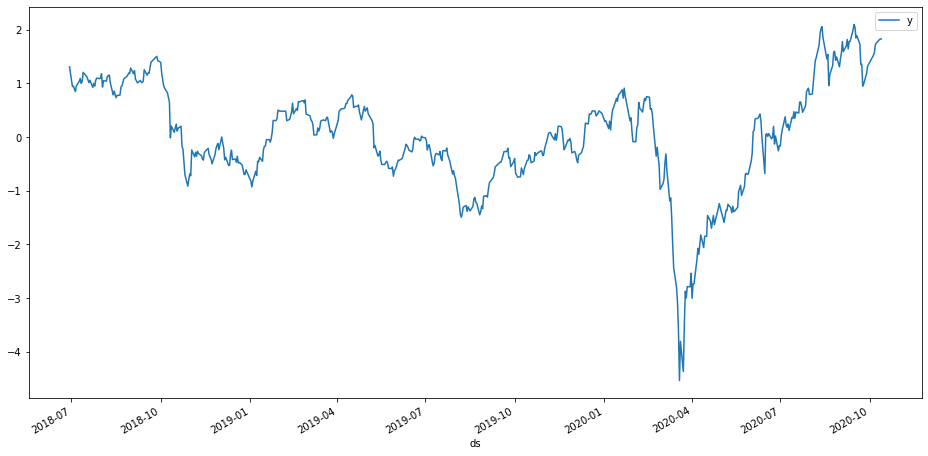

In [27]:
# 데이터의 추이 파악
data.plot(x='ds', y='y', figsize=(16, 8))

In [28]:
# prop_model = Prophet(
#     growth='linear',
#     #changepoints=cp_1,
#     #n_changepoints=25,
#     changepoint_range=0.95,
#     yearly_seasonality='auto',
#     weekly_seasonality='auto',
#     daily_seasonality='auto',
#     holidays=None,
#     seasonality_mode='additive',
#     seasonality_prior_scale=10.0,
#     holidays_prior_scale=10.0,
#     changepoint_prior_scale=0.05,
#     mcmc_samples=0,
#     interval_width=0.8,
#     uncertainty_samples=1000,
#     stan_backend=None,
# )
prop_model=Prophet(yearly_seasonality='auto',
     weekly_seasonality='auto',
     daily_seasonality='auto',
     changepoint_prior_scale=0.15,
     changepoint_range=0.9
     )

model = prop_model
# model = Prophet()
model.add_country_holidays(country_name='KR')
model.fit(data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Kim SeoJeong\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [29]:
#!pip install workalendar
from workalendar.asia import SouthKorea
kor_holidays = pd.concat([pd.Series(np.array(SouthKorea().holidays(2020))[:, 0]), pd.Series(np.array(SouthKorea().holidays(2021))[:, 0])]).reset_index(drop=True)

future = model.make_future_dataframe(periods=10)
future = future[future.ds.dt.weekday != 5]
future = future[future.ds.dt.weekday != 6]
for kor_holiday in kor_holidays:
    future = future[future.ds != kor_holiday]
    
future.tail()

,ds
567,2020-10-19
568,2020-10-20
569,2020-10-21
570,2020-10-22
571,2020-10-23


In [30]:
forecast = model.predict(future)
forecast.tail(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Alternative holiday of Children's Day,Alternative holiday of Children's Day_lower,Alternative holiday of Children's Day_upper,Alternative holiday of Chuseok,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
560,2020-10-12,1.589026,1.254786,2.074368,1.589026,1.589026,0.0,0.0,0.0,0.0,...,-0.103321,-0.103321,-0.103321,0.164161,0.164161,0.164161,0.0,0.0,0.0,1.649866
561,2020-10-13,1.604576,1.278661,2.095968,1.604576,1.604576,0.0,0.0,0.0,0.0,...,-0.056080,-0.056080,-0.056080,0.130081,0.130081,0.130081,0.0,0.0,0.0,1.678577
562,2020-10-14,1.620125,1.246796,2.063408,1.620125,1.620125,0.0,0.0,0.0,0.0,...,-0.046675,-0.046675,-0.046675,0.097075,0.097075,0.097075,0.0,0.0,0.0,1.670525
563,2020-10-15,1.635674,1.248523,2.043735,1.635674,1.635674,0.0,0.0,0.0,0.0,...,-0.068703,-0.068703,-0.068703,0.065474,0.065474,0.065474,0.0,0.0,0.0,1.632445
564,2020-10-16,1.651224,1.206088,2.028627,1.651224,1.651224,0.0,0.0,0.0,0.0,...,-0.063844,-0.063844,-0.063844,0.035593,0.035593,0.035593,0.0,0.0,0.0,1.622973
565,2020-10-19,1.697872,1.141181,1.963687,1.697872,1.697872,0.0,0.0,0.0,0.0,...,-0.103321,-0.103321,-0.103321,-0.040994,-0.040994,-0.040994,0.0,0.0,0.0,1.553557
566,2020-10-20,1.713421,1.166247,2.011542,1.713421,1.713706,0.0,0.0,0.0,0.0,...,-0.056080,-0.056080,-0.056080,-0.061445,-0.061445,-0.061445,0.0,0.0,0.0,1.595897
567,2020-10-21,1.728971,1.173988,2.033643,1.728354,1.731118,0.0,0.0,0.0,0.0,...,-0.046675,-0.046675,-0.046675,-0.079104,-0.079104,-0.079104,0.0,0.0,0.0,1.603191
568,2020-10-22,1.744520,1.169839,1.998457,1.741170,1.750646,0.0,0.0,0.0,0.0,...,-0.068703,-0.068703,-0.068703,-0.093896,-0.093896,-0.093896,0.0,0.0,0.0,1.581921
569,2020-10-23,1.760069,1.192065,1.997054,1.754517,1.768979,0.0,0.0,0.0,0.0,...,-0.063844,-0.063844,-0.063844,-0.105799,-0.105799,-0.105799,0.0,0.0,0.0,1.590426


In [31]:
forecast[['ds','yhat','yhat_upper','yhat_lower']]

,ds,yhat,yhat_upper,yhat_lower
0,2018-06-29,1.105906,1.516104,0.689378
1,2018-07-02,1.023897,1.415397,0.594722
2,2018-07-03,1.059706,1.465652,0.616723
3,2018-07-04,1.059424,1.482608,0.672239
4,2018-07-05,1.029613,1.413021,0.631355
...,...,...,...,...
565,2020-10-19,1.553557,1.963687,1.141181
566,2020-10-20,1.595897,2.011542,1.166247
567,2020-10-21,1.603191,2.033643,1.173988
568,2020-10-22,1.581921,1.998457,1.169839


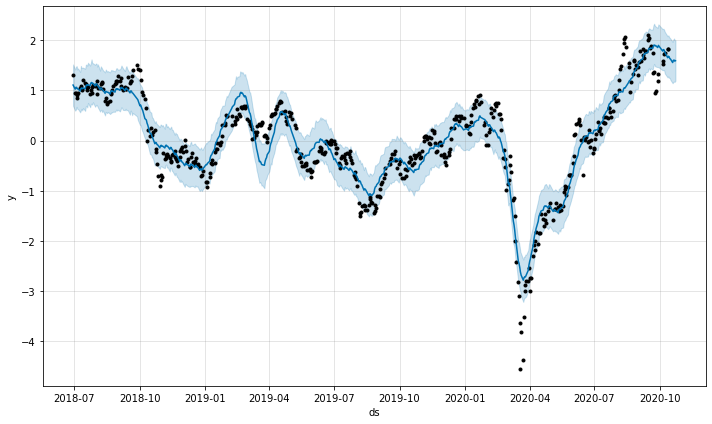

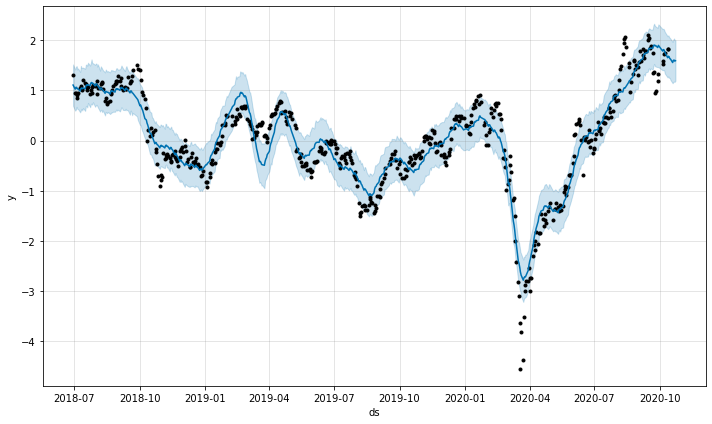

In [32]:
model.plot(forecast)

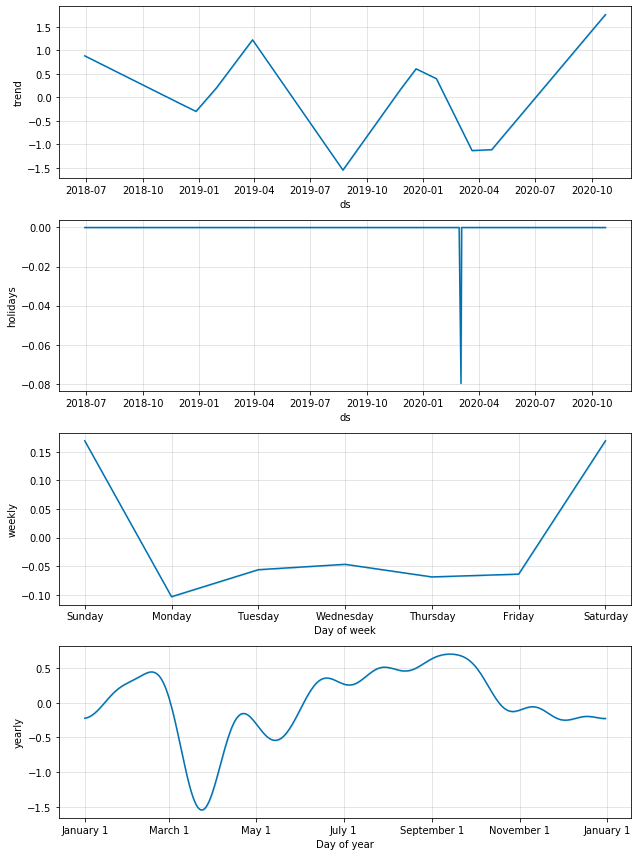

In [33]:
fig2 = model.plot_components(forecast)

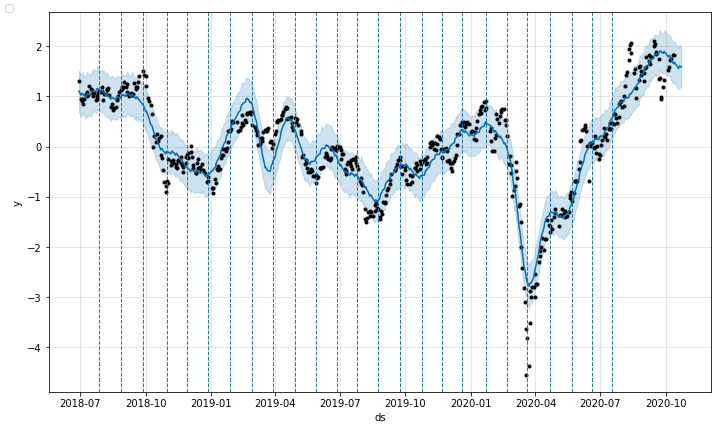

In [34]:
figure = model.plot(forecast)
for changepoint in model.changepoints:
    plt.axvline(changepoint,ls='--', lw=1)
figure.legend(loc=2)


In [35]:
from fbprophet.diagnostics import cross_validation
df.shape

(562, 55)

# Cross Validation

- For measuring forecast error by comparing the predicted values with the actual values
- initial:the size of the initial training period
- period : the spacing between cutoff dates
- horizon : the forecast horizon((ds minus cutoff)
- By default, the initial training period is set to three times the horizon, and cutoffs are made every half a horizon

In [36]:
cv = cross_validation(model,initial='534 days', period='20 days', horizon = '134 days')

cv.head()

INFO:fbprophet:Making 9 forecasts with cutoffs between 2019-12-24 00:00:00 and 2020-06-01 00:00:00


C:\Users\Kim SeoJeong\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Users\Kim SeoJeong\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Users\Kim SeoJeong\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Users\Kim SeoJeong\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the 

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-12-26,0.380734,0.092215,0.662380,0.446098,2019-12-24
1,2019-12-27,0.402829,0.108978,0.677780,0.488390,2019-12-24
2,2019-12-30,0.419652,0.143265,0.700798,0.444347,2019-12-24
3,2020-01-02,0.475225,0.205231,0.744920,0.292820,2019-12-24
4,2020-01-03,0.514498,0.224511,0.778877,0.301507,2019-12-24


In [39]:
from fbprophet.diagnostics import performance_metrics
df_pm = performance_metrics(cv)
df_pm

,horizon,mse,rmse,mae,mape,mdape,coverage
0,15 days,1.965389,1.401923,1.215995,1.847639,1.329405,0.109756
1,16 days,2.168492,1.472580,1.281016,1.836787,1.367178,0.097561
2,17 days,2.302064,1.517255,1.328207,2.205449,1.462665,0.085366
3,18 days,2.461040,1.568770,1.378203,2.550796,1.510329,0.097561
4,19 days,2.669029,1.633716,1.430968,2.638196,1.543616,0.097561
...,...,...,...,...,...,...,...
115,130 days,46.274569,6.802541,5.781239,16.447415,6.918277,0.048780
116,131 days,47.719680,6.907943,5.853167,24.784613,6.918277,0.048780
117,132 days,48.736132,6.981127,5.891373,24.406372,7.137857,0.048780
118,133 days,49.817847,7.058176,5.924257,24.104524,7.029713,0.060976


# Visualizing Performance Metrics
- cutoff: how far into the future the prediction was

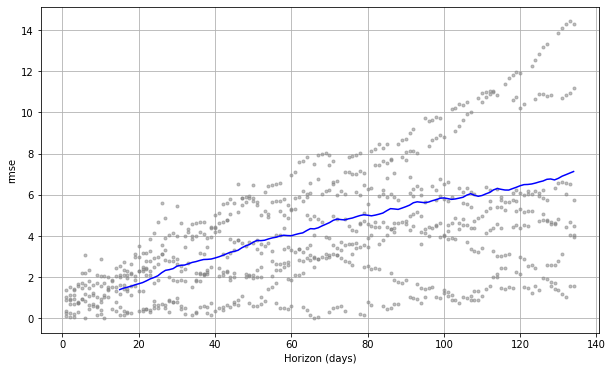

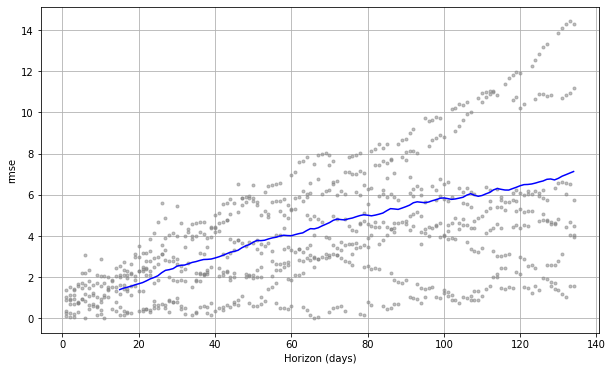

In [38]:
from fbprophet.plot import plot_cross_validation_metric

plot_cross_validation_metric(cv,metric='rmse')

# 2) YG

In [42]:
model_yg.describe()

,Open,High,Low,Close,Volume,Market_Value_x,Value_x,Num_Stock_x,ma_5,ma_10,...,kosdaq_inst_value,kosdaq_indi_value,kosdaq_fore_value,kosdaq_etc_value,kosdaq_short_sell_value,kosdaq_150_Close,kosdaq_150_comm_Close,kosdaq_enter_Close,kosdaq_large_Close,kosdaq_super_Close
count,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,...,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02
mean,4.559437e-18,-4.422654e-17,-3.036585e-16,7.340694e-17,-1.078307e-16,-4.103494e-18,1.709789e-16,-6.930345e-15,1.326796e-16,-2.079103e-16,...,5.152164e-17,-1.203691e-16,-1.124357e-15,8.754120e-17,-9.711602e-17,-1.430296e-15,6.769397e-15,-5.037494e-15,2.559668e-15,8.328268e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.663518e+00,-1.668652e+00,-1.700464e+00,-1.689256e+00,-7.631428e-01,-1.680632e+00,-7.155154e-01,-5.452907e-01,-1.591551e+00,-1.545043e+00,...,-1.509361e+00,-1.119940e+00,-1.385118e+00,-3.111348e-01,-1.464083e+00,-2.819031e+00,-3.117264e+00,-2.908292e+00,-2.825487e+00,-3.281132e+00
25%,-8.458462e-01,-8.582275e-01,-8.521111e-01,-8.499772e-01,-4.438662e-01,-8.474442e-01,-4.745890e-01,-5.452907e-01,-8.657623e-01,-8.828528e-01,...,-9.711363e-01,-1.119940e+00,-1.385118e+00,-3.111348e-01,-1.328266e+00,-8.068704e-01,-7.055302e-01,-6.612098e-01,-7.874233e-01,-6.028071e-01
50%,-1.625867e-01,-1.631850e-01,-1.374030e-01,-1.289863e-01,-2.398592e-01,-1.316942e-01,-2.606130e-01,-2.698430e-01,-1.615882e-01,-1.519617e-01,...,5.168087e-02,-4.036487e-03,2.123884e-01,-3.111348e-01,2.155377e-01,1.599644e-02,-8.521773e-02,-1.329277e-01,-2.518261e-02,-1.782384e-01
75%,7.362917e-01,7.653697e-01,7.022337e-01,7.215576e-01,1.155859e-01,7.161295e-01,1.000228e-01,-1.263324e-01,7.314275e-01,7.581883e-01,...,6.586558e-01,4.689222e-01,6.611749e-01,-2.269371e-01,6.462874e-01,7.952133e-01,8.273122e-01,8.738704e-01,7.298988e-01,4.806495e-01
max,2.783270e+00,2.770828e+00,2.779536e+00,2.732446e+00,1.227289e+01,2.756454e+00,1.189213e+01,4.115793e+00,2.688099e+00,2.626118e+00,...,3.335708e+00,7.028104e+00,2.764766e+00,1.209382e+01,2.652483e+00,2.117817e+00,1.963633e+00,2.156600e+00,2.285260e+00,2.636833e+00


In [43]:
df=copy.deepcopy(model_yg)

In [44]:
#df.date = df.date.astype(str)
#df.date = df.date.str[:4] + '-' + df.date.str[4:6] + '-' + df.date.str[6:]
df['date'] = pd.to_datetime(df.index)

data = df[['date', 'Close']].reset_index(drop=True)

data = data.rename(columns={'date': 'ds', 'Close': 'y'})

data.head()

,ds,y
0,2018-10-02,1.149646
1,2018-10-05,0.986296
2,2018-10-08,0.760987
3,2018-10-10,0.868009
4,2018-10-11,0.586372


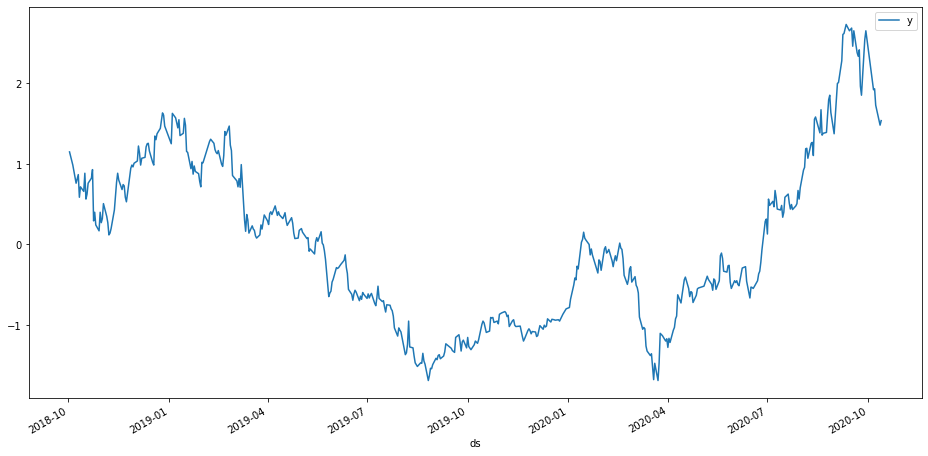

In [45]:
# 데이터의 추이 파악
data.plot(x='ds', y='y', figsize=(16, 8))

In [75]:
# cp=['2019-10-23', '2019-11-04', '2019-11-13', '2019-11-22', '2019-12-04', '2019-12-13', '2019-12-26', '2020-01-08', '2020-01-17', '2020-01-31', '2020-02-11', '2020-02-20', '2020-03-03', '2020-03-12', '2020-03-23', '2020-04-02', '2020-04-13', '2020-04-23', '2020-05-08', '2020-05-19', '2020-05-29', '2020-06-09', '2020-06-18', '2020-06-30', '2020-07-09']

cp_spc=['2020-08-11',
 '2020-08-12',
 '2020-08-13',
 '2020-08-18',
 '2020-08-19',
 '2020-08-20',
 '2020-08-26',
 '2020-08-28',
 '2020-08-31',
 '2020-09-02',
 '2020-09-03',
 '2020-09-07',
 '2020-09-08']

cp_default=['2018-10-29',
    '2018-11-19',
    '2018-12-11',
    '2019-01-04',
    '2019-01-29',
    '2019-02-22',
   '2019-03-19',
   '2019-04-10',
   '2019-05-03',
   '2019-05-27',
   '2019-06-19',
   '2019-07-10',
   '2019-08-01',
   '2019-08-26',
   '2019-09-20',
   '2019-10-15',
   '2019-11-07',
   '2019-11-29',
   '2019-12-26',
   '2020-01-20',
   '2020-02-13',
   '2020-03-05',
   '2020-03-30',
   '2020-04-21',
   '2020-05-18']
cp=cp_default+cp_spc
cp

['2018-10-29',
 '2018-11-19',
 '2018-12-11',
 '2019-01-04',
 '2019-01-29',
 '2019-02-22',
 '2019-03-19',
 '2019-04-10',
 '2019-05-03',
 '2019-05-27',
 '2019-06-19',
 '2019-07-10',
 '2019-08-01',
 '2019-08-26',
 '2019-09-20',
 '2019-10-15',
 '2019-11-07',
 '2019-11-29',
 '2019-12-26',
 '2020-01-20',
 '2020-02-13',
 '2020-03-05',
 '2020-03-30',
 '2020-04-21',
 '2020-05-18',
 '2020-08-11',
 '2020-08-12',
 '2020-08-13',
 '2020-08-18',
 '2020-08-19',
 '2020-08-20',
 '2020-08-26',
 '2020-08-28',
 '2020-08-31',
 '2020-09-02',
 '2020-09-03',
 '2020-09-07',
 '2020-09-08']

In [76]:
from fbprophet import Prophet
from workalendar.asia import SouthKorea


#     growth='linear',
#     #changepoints=cp_1,
#     #n_changepoints=25,
#     changepoint_range=0.95,
#     yearly_seasonality='auto',
#     weekly_seasonality='auto',
#     daily_seasonality='auto',
#     holidays=None,
#     seasonality_mode='additive',
#     seasonality_prior_scale=10.0,
#     holidays_prior_scale=10.0,
#     changepoint_prior_scale=0.05,
#     mcmc_samples=0,
#     interval_width=0.8,
#     uncertainty_samples=1000,
#     stan_backend=None,

m = Prophet(yearly_seasonality='auto',
     weekly_seasonality='auto',
     daily_seasonality='auto',
     changepoints=cp
     changepoint_range=0.8,
     changepoint_prior_scale=0.1
     )
m.fit(data)
pred_days=int(input('How many days do you want to predict?'))
kor_holidays = pd.concat([pd.Series(np.array(SouthKorea().holidays(2019))[:, 0]), pd.Series(np.array(SouthKorea().holidays(2020))[:, 0])]).reset_index(drop=True)
future = m.make_future_dataframe(periods=pred_days)

future = future[future.ds.dt.weekday != 5]
future = future[future.ds.dt.weekday != 6]
for kor_holiday in kor_holidays:
    future = future[future.ds != kor_holiday]
    
future.tail()
forecast = m.predict(future)

SyntaxError: invalid syntax (<ipython-input-76-ed0118edf075>, line 26)

In [77]:
forecast[ [ 'ds', 'yhat', 'yhat_lower', 'yhat_upper' ] ].tail(pred_days)

,ds,yhat,yhat_lower,yhat_upper
485,2020-10-12,2.435497,2.154371,2.755486
486,2020-10-13,2.491583,2.183435,2.761458
487,2020-10-14,2.559042,2.249625,2.846045
488,2020-10-15,2.568258,2.274863,2.843272
489,2020-10-16,2.606889,2.302378,2.894105
490,2020-10-19,2.700031,2.376286,2.994500
491,2020-10-20,2.761391,2.463506,3.055797
492,2020-10-21,2.831094,2.522942,3.138059
493,2020-10-22,2.839577,2.532978,3.136142
494,2020-10-23,2.874634,2.574385,3.168880


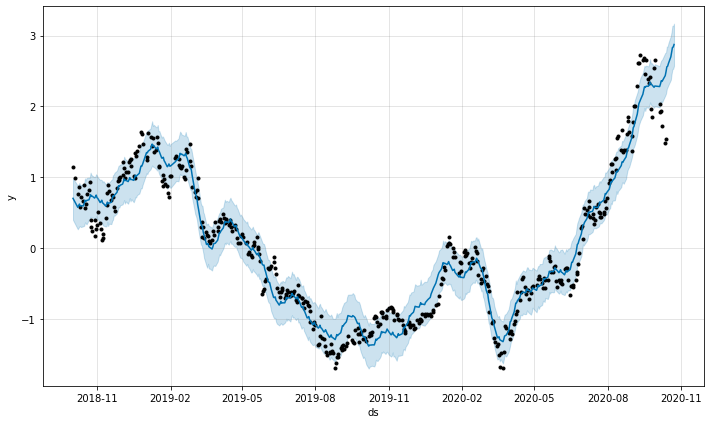

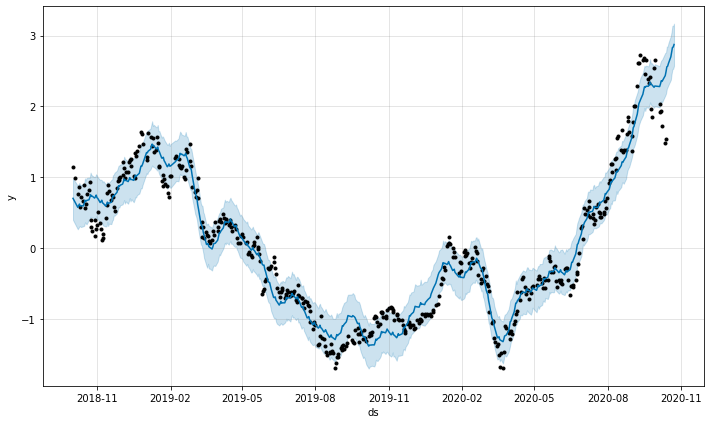

In [78]:
m.plot(forecast)

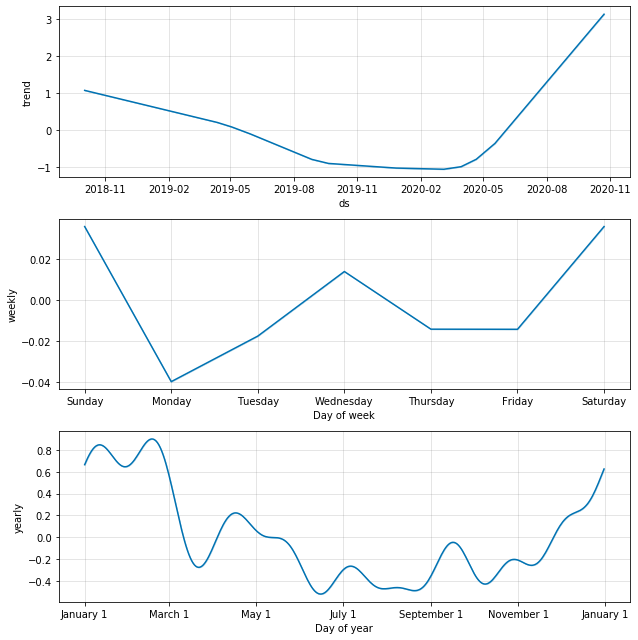

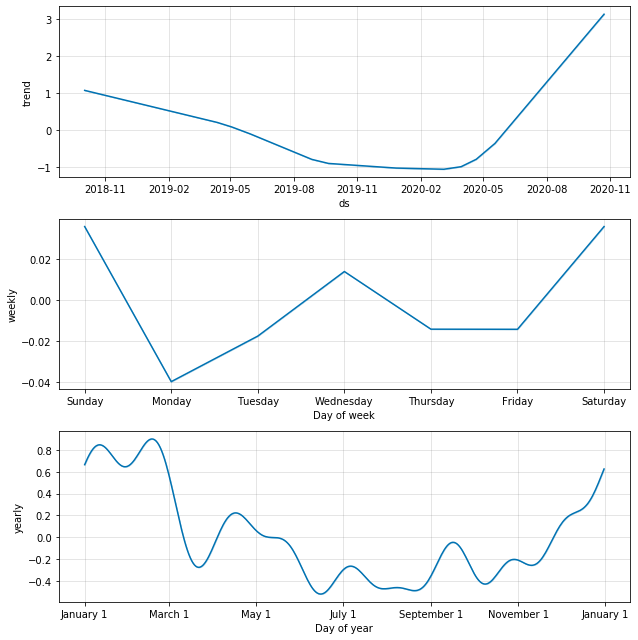

In [79]:
m.plot_components( forecast)

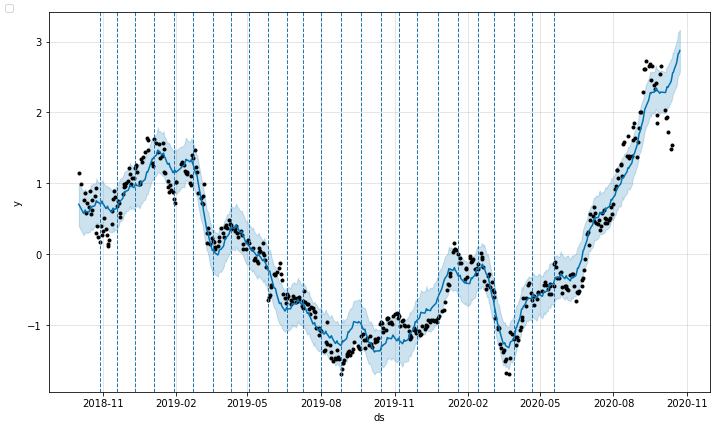

In [80]:
figure = m.plot(forecast)
for changepoint in m.changepoints:
    plt.axvline(changepoint,ls='--', lw=1)
figure.legend(loc=2)

In [81]:
print(m.changepoints)

16    2018-10-29
31    2018-11-19
47    2018-12-11
62    2019-01-04
78    2019-01-29
93    2019-02-22
109   2019-03-19
124   2019-04-10
140   2019-05-03
155   2019-05-27
171   2019-06-19
186   2019-07-10
202   2019-08-01
217   2019-08-26
233   2019-09-20
248   2019-10-15
264   2019-11-07
279   2019-11-29
295   2019-12-26
310   2020-01-20
326   2020-02-13
341   2020-03-05
357   2020-03-30
372   2020-04-21
388   2020-05-18
Name: ds, dtype: datetime64[ns]


In [72]:
# 예측한 값만 표로 보기
pred=forecast.tail(pred_days)
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
485,2020-10-12,2.882121,2.154371,2.755486,2.882121,2.882121,-0.446624,-0.446624,-0.446624,-0.039953,-0.039953,-0.039953,-0.406671,-0.406671,-0.406671,0.0,0.0,0.0,2.435497
486,2020-10-13,2.904194,2.183435,2.761458,2.904194,2.904194,-0.412612,-0.412612,-0.412612,-0.017625,-0.017625,-0.017625,-0.394987,-0.394987,-0.394987,0.0,0.0,0.0,2.491583
487,2020-10-14,2.926267,2.249625,2.846045,2.926267,2.926267,-0.367225,-0.367225,-0.367225,0.014015,0.014015,0.014015,-0.381240,-0.381240,-0.381240,0.0,0.0,0.0,2.559042
488,2020-10-15,2.948341,2.274863,2.843272,2.948341,2.948341,-0.380083,-0.380083,-0.380083,-0.014241,-0.014241,-0.014241,-0.365842,-0.365842,-0.365842,0.0,0.0,0.0,2.568258
489,2020-10-16,2.970414,2.302378,2.894105,2.970414,2.970414,-0.363524,-0.363524,-0.363524,-0.014295,-0.014295,-0.014295,-0.349230,-0.349230,-0.349230,0.0,0.0,0.0,2.606889
490,2020-10-19,3.036633,2.376286,2.994500,3.036633,3.036633,-0.336602,-0.336602,-0.336602,-0.039953,-0.039953,-0.039953,-0.296649,-0.296649,-0.296649,0.0,0.0,0.0,2.700031
491,2020-10-20,3.058706,2.463506,3.055797,3.058706,3.058706,-0.297315,-0.297315,-0.297315,-0.017625,-0.017625,-0.017625,-0.279690,-0.279690,-0.279690,0.0,0.0,0.0,2.761391
492,2020-10-21,3.080780,2.522942,3.138059,3.080394,3.080949,-0.249686,-0.249686,-0.249686,0.014015,0.014015,0.014015,-0.263701,-0.263701,-0.263701,0.0,0.0,0.0,2.831094
493,2020-10-22,3.102853,2.532978,3.136142,3.101911,3.103650,-0.263276,-0.263276,-0.263276,-0.014241,-0.014241,-0.014241,-0.249035,-0.249035,-0.249035,0.0,0.0,0.0,2.839577
494,2020-10-23,3.124926,2.574385,3.168880,3.123717,3.126417,-0.250292,-0.250292,-0.250292,-0.014295,-0.014295,-0.014295,-0.235997,-0.235997,-0.235997,0.0,0.0,0.0,2.874634


In [ ]:
# plt.rc('font', family='NanumBarunGothic') 

# fig = plt.figure(figsize=(15,12))
# ax1 = fig.add_subplot(211)
# ax1.plot(y['종가'],label='Y')
# ax1.plot(pred['yhat'],color='red',label='Yhat')
# ax1.plot(pred['yhat_lower'],color='green',label='Yhat_Lower')
# ax1.plot(pred['yhat_upper'],color='green',label='Yhat_Upper')
# ax1.set_xlabel('Date')
# ax1.set_ylabel('Y')
# ax1.legend(loc='best')
# plt.show